**Importing the libraries:**
First, we are going to import all the modules that we are going to need for training our model.

In [ ]:
import cv2
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt

**Loading the dataset:**
The Keras library already contains some datasets and MNIST is one of them. So we can easily import the dataset and start working with it. The mnist.load_data() method returns us the training data, its labels and also the testing data and its labels.

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


**The first two lines of codes displays the image and the last line prints the value of the digit corresponding to that image.**

Display data as an image; i.e. on a 2D regular raster.The input may either be actual RGB(A) data, or 2D scalar data, which
will be rendered as a pseudocolor image. Note: For actually displaying
a grayscale image set up the color mapping using the parameters
cmap='gray', vmin=0, vmax=255.


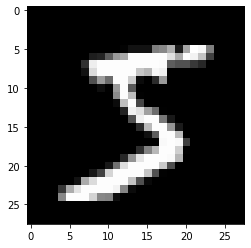

Label:  5


In [ ]:
plt.imshow(X_train[0], cmap="gray")
plt.show()
print ('Label: ',y_train[0])

**Checking out the shapes involved in dataset and To see how much images does our training data has.**

In [ ]:
print ("Shape of X_train: ",X_train.shape)
print ("Shape of y_train: ",y_train.shape)
print ("Shape of X_test: ",X_test.shape)
print ("Shape of y_test: ",y_test.shape)

Shape of X_train:  (60000, 28, 28)
Shape of y_train:  (60000,)
Shape of X_test:  (10000, 28, 28)
Shape of y_test:  (10000,)


**Reshape:**
The array of pixel values are reshaped into a (28,28,1) matrix. We are feeding the CNN model with input_shape of 28x28x1 matrix.

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

**Checking out the shapes of the updated X_train,X_test,y_train and y_test which involved in dataset.**

In [ ]:
print ("Shape of X_train: ",X_train.shape)
print ("Shape of y_train: ",y_train.shape)
print ("Shape of X_test: ",X_test.shape)
print ("Shape of y_test: ",y_test.shape)

Shape of X_train:  (60000, 28, 28, 1)
Shape of y_train:  (60000,)
Shape of X_test:  (10000, 28, 28, 1)
Shape of y_test:  (10000,)


**to_categorical function:** Converting a class vector (integers) to binary class matrix. E.g. for use with categorical_crossentropy. Arguments. y: class vector to be converted into a matrix (integers from 0 to num_classes).

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

**Building the CNN layers:**
One way to improve the performance a Neural Network is to add more layers.We have used sequential model and then I have added convolutional and pooling layer to the model. Here in activation I have used relu, it is used in almost all the convolutional neural networks or deep learning. I have added dropout layer in between to reduce overfitting and Dense layer for class prediction.I used relu activation for the input layer and softmax activation for the output layers.

In [ ]:
## model
model = Sequential()
## No of layers in model
layer_1 = Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1))
layer_2 = Conv2D(64, kernel_size=3, activation='relu')
layer_3 = Flatten()
layer_4 = Dense(10, activation='softmax')
## Combining layers
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)

Then I set an optimizer with a given loss function which uses a metric and fit the model by using our train data. The ADAM optimizer is said to outperform the other optimizers, that’s why I used that.

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

When this model is evaluated we see that just 3 epochs gave use the accuracy of 98.81% at a very low loss.

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 126s 67ms/step - loss: 1.3563 - accuracy: 0.9182 - val_loss: 0.0951 - val_accuracy: 0.9699
Epoch 2/3
1875/1875 [==============================] - 125s 67ms/step - loss: 0.0594 - accuracy: 0.9820 - val_loss: 0.0853 - val_accuracy: 0.9764
Epoch 3/3
1875/1875 [==============================] - 126s 67ms/step - loss: 0.0372 - accuracy: 0.9881 - val_loss: 0.0858 - val_accuracy: 0.9778


Here, we select an image and run it through to get the 3 different prediction then display both the image and prediction to see if its accurate.


Prediction (Softmax) from the neural network:  [[1.3105731e-14 3.9209280e-13 7.4607054e-10 1.0000000e+00 2.9568436e-14
  3.1674705e-11 2.0707670e-18 3.2126827e-12 1.0137501e-08 8.2206286e-09]]
Hard-maxed form of the prediction:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Prediction



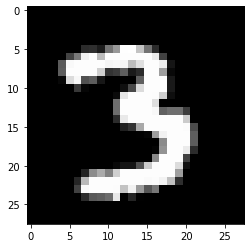

Digit:  3


In [ ]:
test = X_test[500]
prediction = model.predict(test.reshape(1, 28, 28, 1))
## Softmax output
print("Prediction (Softmax) from the neural network: ",prediction)

## Probability output
hard_maxed_prediction = np.zeros(prediction.shape)
hard_maxed_prediction[0][np.argmax(prediction)] = 1
print("Hard-maxed form of the prediction: ",hard_maxed_prediction)

## Label output
print("Prediction\n")
plt.imshow(test.reshape(28, 28), cmap="gray")
plt.show()
print("Digit: ",np.argmax(prediction))

**Checking the OpenCV version using Python**

In [ ]:
cv2.__version__

'4.1.2'

Now we will copies the image to another image object using image.copy() method, this method is useful when we need to copy the image but also retain the original and greyscale it. Then we will transform this image to our specific input format.

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/1_FL6DWzN-awxCaG8bS1ZD_Q.png')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
contours,_ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

preprocessed_digits = []

Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours),Cropping out the digit from the image corresponding to the current contours in the for loop,Resizing that digit to (18, 18),Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28) and  Adding the preprocessed digit to the list of preprocessed digits.

In [ ]:
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)

Here, I displaying the Contoured image.

Contoured Image


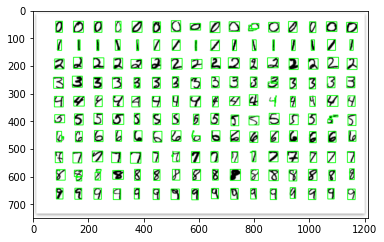

In [ ]:
print("Contoured Image")
plt.imshow(image, cmap="gray")
plt.show()
inp = np.array(preprocessed_digits)

Here, , I will be printing the output for each of the processed digits and run it through to get the 2 different prediction then display both the image and prediction to see if its accurate.

Prediction


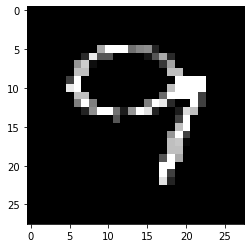

Output:  7

Prediction (Softmax) from the neural network:
 [[2.2773060e-07 7.3197878e-11 8.7024833e-05 1.4351241e-03 1.4465404e-01
  5.8022146e-05 2.1576938e-09 8.4140974e-01 4.6919365e-03 7.6638479e-03]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


Prediction


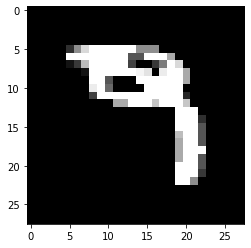

Output:  3

Prediction (Softmax) from the neural network:
 [[1.6544220e-09 4.5361891e-11 1.9309055e-05 9.9860114e-01 7.4496263e-11
  4.5421306e-10 8.3148744e-15 1.3710072e-03 4.2883626e-06 4.2336187e-06]]

Hard-maxed form of the prediction:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


Prediction


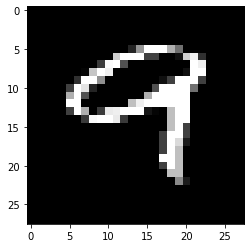

Output:  9

Prediction (Softmax) from the neural network:
 [[2.9392297e-08 5.6336205e-05 2.9704015e-04 1.7469604e-02 2.7443966e-04
  4.2978209e-04 3.0921885e-08 1.9051206e-03 7.9171741e-03 9.7165042e-01]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Prediction


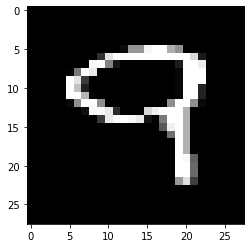

Output:  9

Prediction (Softmax) from the neural network:
 [[3.1959144e-10 6.9063586e-13 1.2970251e-06 8.5215696e-08 8.4625992e-07
  6.9963848e-09 3.1980869e-13 1.7794180e-07 1.8606947e-01 8.1392807e-01]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Prediction


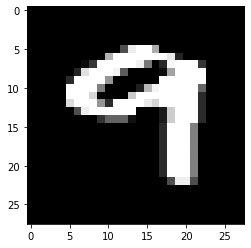

Output:  9

Prediction (Softmax) from the neural network:
 [[1.1514513e-03 4.6440141e-06 1.1595552e-03 6.4976022e-02 2.5869808e-03
  2.5245023e-03 1.2880399e-12 6.3807480e-02 1.3027790e-02 8.5076153e-01]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Prediction


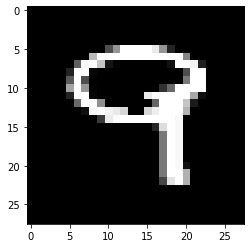

Output:  9

Prediction (Softmax) from the neural network:
 [[1.1491236e-10 3.7842320e-13 1.4636034e-05 9.6466101e-05 5.6908215e-07
  1.1892307e-07 1.8260362e-14 9.9670117e-08 4.1263661e-01 5.8725154e-01]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Prediction


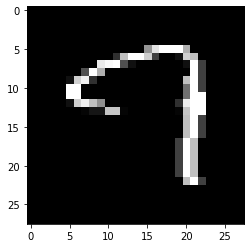

Output:  0

Prediction (Softmax) from the neural network:
 [[9.5304376e-01 3.6457600e-08 1.4255793e-03 4.2660748e-08 2.6319536e-05
  5.5828691e-06 2.9949931e-12 2.1374337e-02 6.7353659e-07 2.4123587e-02]]

Hard-maxed form of the prediction:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


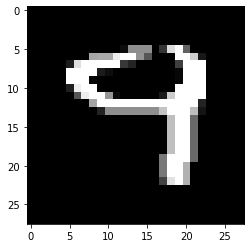

Output:  8

Prediction (Softmax) from the neural network:
 [[5.9115788e-08 2.2526027e-08 6.2834465e-06 1.6134987e-05 1.4788931e-04
  6.7652536e-06 1.7654326e-12 2.2661356e-05 9.9804354e-01 1.7566814e-03]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Prediction


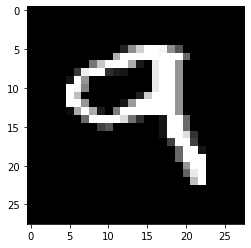

Output:  9

Prediction (Softmax) from the neural network:
 [[4.3694268e-10 4.9288150e-07 1.2972845e-03 7.4976921e-04 1.0103382e-04
  2.2874506e-06 2.5939151e-10 8.5633146e-06 2.3671584e-03 9.9547344e-01]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Prediction


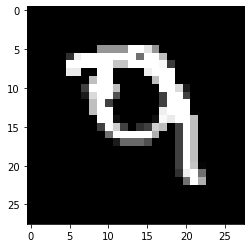

Output:  2

Prediction (Softmax) from the neural network:
 [[2.0250569e-10 3.6628163e-17 9.9602556e-01 2.7418090e-03 1.1909103e-03
  3.9428346e-13 1.0326903e-12 2.4596243e-09 3.5986377e-05 5.6778476e-06]]

Hard-maxed form of the prediction:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


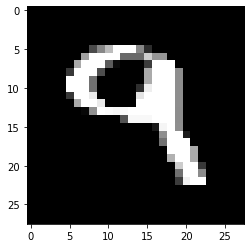

Output:  9

Prediction (Softmax) from the neural network:
 [[2.7374090e-12 2.7383084e-11 8.1040334e-08 6.0174639e-06 4.5775518e-02
  7.3350088e-07 2.5780905e-15 4.1061725e-08 6.0698297e-03 9.4814783e-01]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Prediction


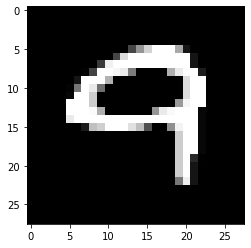

Output:  9

Prediction (Softmax) from the neural network:
 [[9.6723618e-10 1.0105218e-09 2.6490892e-05 9.6269760e-06 9.7007607e-04
  4.7543408e-06 1.0500266e-10 2.7501923e-08 1.6227122e-01 8.3671778e-01]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Prediction


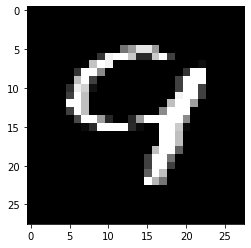

Output:  9

Prediction (Softmax) from the neural network:
 [[3.1989817e-09 6.7655631e-11 8.6406446e-13 1.9492694e-08 4.8830771e-01
  7.7843168e-07 9.9351499e-11 8.2166216e-06 1.2620527e-02 4.9906275e-01]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Prediction


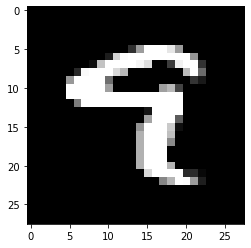

Output:  7

Prediction (Softmax) from the neural network:
 [[8.1269398e-05 6.6129354e-07 7.5618140e-02 1.0370043e-05 1.1364092e-07
  9.6162148e-05 3.0339842e-09 8.6991006e-01 2.3089526e-05 5.4260161e-02]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


Prediction


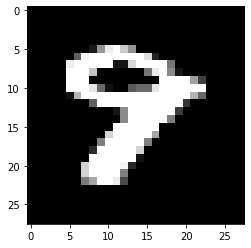

Output:  8

Prediction (Softmax) from the neural network:
 [[6.0823588e-08 2.2498504e-10 2.1485718e-04 7.2216339e-05 6.5679200e-09
  6.8735273e-10 3.8389367e-15 2.7657822e-03 9.9686122e-01 8.5909560e-05]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Prediction


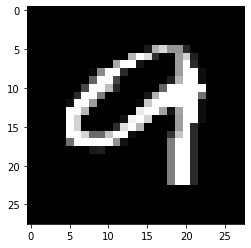

Output:  9

Prediction (Softmax) from the neural network:
 [[1.8639775e-03 1.6208560e-07 6.2363208e-05 7.2952379e-03 4.5626307e-01
  4.3886658e-07 2.5282102e-07 4.6540461e-02 3.1862719e-04 4.8765543e-01]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Prediction


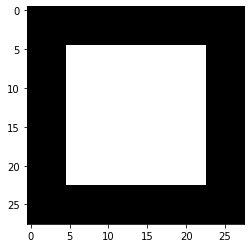

Output:  0

Prediction (Softmax) from the neural network:
 [[9.4350070e-01 8.7311650e-03 4.7753133e-02 7.3502433e-06 1.4682382e-10
  4.1045556e-10 3.0695180e-06 2.1640463e-10 4.5196598e-06 4.6794024e-10]]

Hard-maxed form of the prediction:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


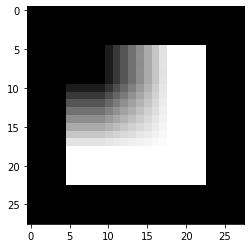

Output:  0

Prediction (Softmax) from the neural network:
 [[9.6519178e-01 2.2854847e-03 3.2522578e-02 2.0876451e-08 3.1977433e-12
  4.9914543e-12 1.7217079e-07 1.4941787e-13 2.1680886e-08 5.4275173e-10]]

Hard-maxed form of the prediction:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


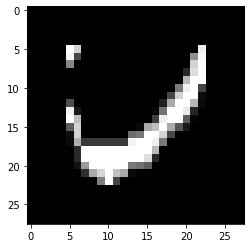

Output:  4

Prediction (Softmax) from the neural network:
 [[1.6004214e-03 8.0595967e-08 1.2586253e-05 2.4066399e-05 9.9587077e-01
  2.5709570e-11 1.4401546e-03 7.8452817e-05 9.7343378e-04 1.0951258e-11]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Prediction


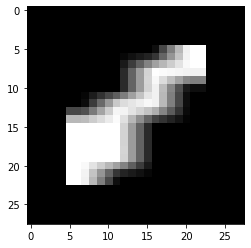

Output:  2

Prediction (Softmax) from the neural network:
 [[2.2211095e-02 6.9735609e-02 8.9084744e-01 5.2247997e-03 3.8731774e-05
  2.8725234e-03 2.3815860e-03 3.6106580e-06 6.1821230e-03 5.0249905e-04]]

Hard-maxed form of the prediction:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


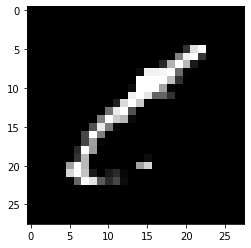

Output:  5

Prediction (Softmax) from the neural network:
 [[1.4649548e-05 3.7166783e-01 4.4201643e-06 2.7698783e-07 4.5000317e-07
  6.2755454e-01 2.2419088e-06 5.1524913e-09 7.5555476e-04 4.0871213e-12]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


Prediction


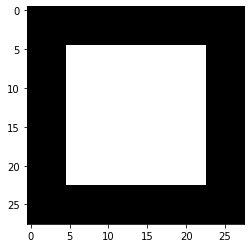

Output:  0

Prediction (Softmax) from the neural network:
 [[9.4350070e-01 8.7311650e-03 4.7753133e-02 7.3502433e-06 1.4682382e-10
  4.1045556e-10 3.0695180e-06 2.1640463e-10 4.5196598e-06 4.6794024e-10]]

Hard-maxed form of the prediction:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


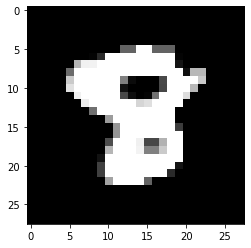

Output:  8

Prediction (Softmax) from the neural network:
 [[6.1729950e-09 1.8851531e-14 1.6169632e-06 8.6723588e-08 2.9568043e-14
  3.7883698e-08 9.4596846e-13 8.0137514e-09 9.9999821e-01 7.3474942e-09]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Prediction


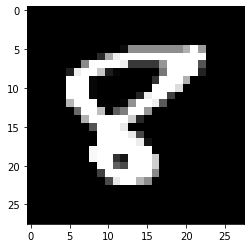

Output:  8

Prediction (Softmax) from the neural network:
 [[1.0236733e-08 9.1178471e-08 9.3073957e-04 4.0520766e-01 7.8902506e-16
  1.5178973e-04 2.3890079e-08 2.0176816e-10 5.9368640e-01 2.3371002e-05]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Prediction


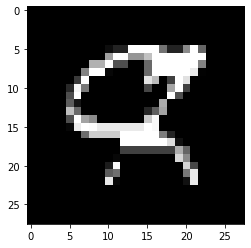

Output:  3

Prediction (Softmax) from the neural network:
 [[6.4369149e-11 1.8800538e-05 3.7734991e-01 5.8108622e-01 1.2061704e-04
  1.4387103e-05 4.7031178e-11 2.1099786e-05 9.7058555e-03 3.1683143e-02]]

Hard-maxed form of the prediction:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


Prediction


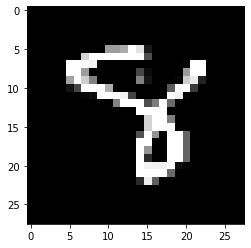

Output:  8

Prediction (Softmax) from the neural network:
 [[2.18429468e-13 4.36915030e-07 6.96115804e-11 1.65980521e-06
  3.82976159e-02 9.53051895e-08 1.41836196e-11 2.22417249e-04
  9.61477757e-01 1.88935112e-09]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Prediction


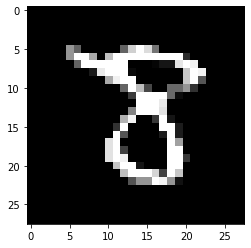

Output:  8

Prediction (Softmax) from the neural network:
 [[1.4560079e-11 3.2842360e-09 2.7806679e-09 1.8192458e-06 3.9914724e-17
  2.7255146e-11 5.3012081e-11 9.5851649e-10 9.9999821e-01 3.2176672e-09]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Prediction


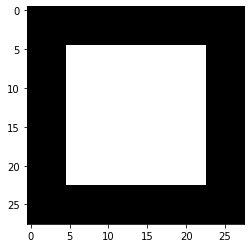

Output:  0

Prediction (Softmax) from the neural network:
 [[9.4350070e-01 8.7311650e-03 4.7753133e-02 7.3502433e-06 1.4682382e-10
  4.1045556e-10 3.0695180e-06 2.1640463e-10 4.5196598e-06 4.6794024e-10]]

Hard-maxed form of the prediction:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


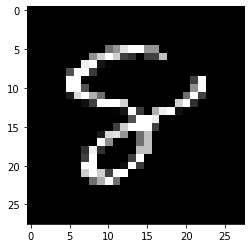

Output:  8

Prediction (Softmax) from the neural network:
 [[8.2898391e-13 5.9847294e-10 1.4709403e-07 1.4040061e-08 2.1992071e-07
  1.8954706e-06 3.2114502e-11 1.2394140e-04 9.9986184e-01 1.1910311e-05]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Prediction


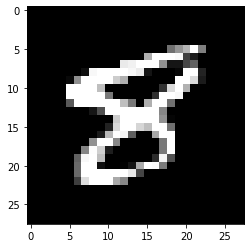

Output:  8

Prediction (Softmax) from the neural network:
 [[7.3144626e-13 2.7943047e-12 3.3575752e-08 3.2127750e-07 4.9960470e-13
  2.3263636e-04 3.2129800e-13 2.3519895e-09 9.9976689e-01 1.6301438e-07]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Prediction


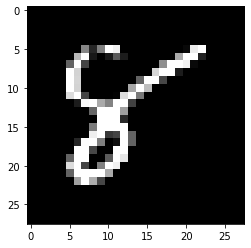

Output:  4

Prediction (Softmax) from the neural network:
 [[6.1189496e-08 3.1994572e-05 1.3835179e-08 6.2752013e-12 5.5296540e-01
  4.4612387e-01 2.9773344e-05 9.9703468e-10 8.4890408e-04 4.6596636e-11]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Prediction


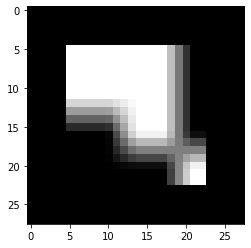

Output:  4

Prediction (Softmax) from the neural network:
 [[6.7026347e-05 3.7478502e-03 3.0852053e-01 1.0307895e-04 6.3079149e-01
  1.1315256e-04 9.5030358e-05 1.4353987e-03 5.5117000e-02 9.4618035e-06]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Prediction


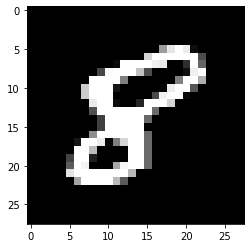

Output:  8

Prediction (Softmax) from the neural network:
 [[1.1014424e-08 3.7096543e-14 3.3161260e-08 4.8084328e-09 1.5823814e-12
  2.3638203e-08 3.5832947e-13 3.9908394e-14 9.9997163e-01 2.8247403e-05]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Prediction


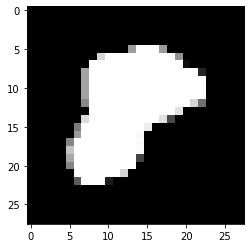

Output:  8

Prediction (Softmax) from the neural network:
 [[2.9161414e-02 9.2200108e-13 8.1941516e-06 5.9919457e-06 4.3409259e-06
  8.7881279e-11 5.9445443e-10 3.7952983e-09 9.6833211e-01 2.4879046e-03]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Prediction


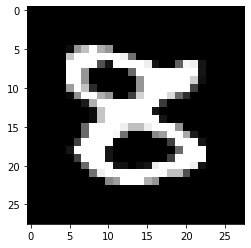

Output:  8

Prediction (Softmax) from the neural network:
 [[1.1922243e-15 7.1246932e-16 3.8680420e-11 3.9391713e-03 2.3244886e-14
  3.1885797e-08 1.6798876e-09 2.7252473e-11 9.9606079e-01 2.0630595e-13]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Prediction


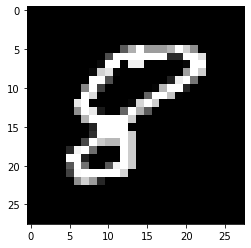

Output:  8

Prediction (Softmax) from the neural network:
 [[9.7569682e-08 2.1544195e-09 7.2971439e-08 6.9894835e-02 1.7143937e-12
  2.0026893e-05 2.1924795e-12 5.0656341e-12 7.2607529e-01 2.0400971e-01]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Prediction


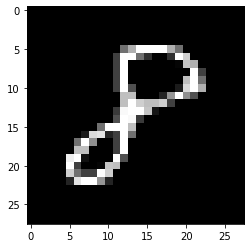

Output:  8

Prediction (Softmax) from the neural network:
 [[9.6099782e-08 2.2718581e-05 6.2497783e-08 1.3960070e-08 1.7075398e-07
  1.9496421e-05 1.9704953e-09 1.2845248e-06 9.9995613e-01 3.8908109e-08]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Prediction


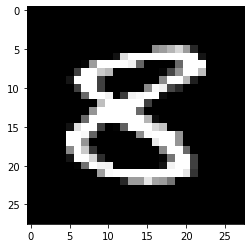

Output:  5

Prediction (Softmax) from the neural network:
 [[1.7408107e-05 2.8160330e-12 7.3023893e-06 2.4084618e-02 2.2506755e-13
  9.7202098e-01 3.1099756e-07 2.7178912e-12 3.8679016e-03 1.4240630e-06]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


Prediction


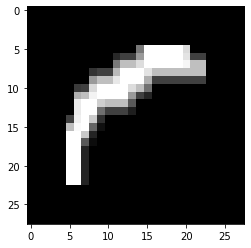

Output:  0

Prediction (Softmax) from the neural network:
 [[9.9378693e-01 2.6385708e-06 2.5828127e-04 7.5208682e-08 7.2221513e-07
  5.5126804e-03 7.9567566e-05 3.3694823e-04 9.6231370e-06 1.2485169e-05]]

Hard-maxed form of the prediction:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


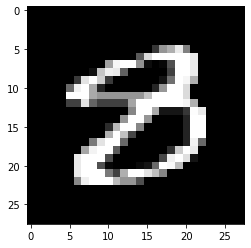

Output:  2

Prediction (Softmax) from the neural network:
 [[1.1326388e-03 2.4160089e-08 9.8609656e-01 5.3111441e-03 4.3067173e-14
  3.5880097e-07 5.7225136e-12 1.0802960e-03 6.3790339e-03 8.4339220e-08]]

Hard-maxed form of the prediction:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


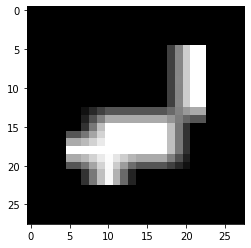

Output:  2

Prediction (Softmax) from the neural network:
 [[1.4753519e-03 2.9661197e-03 9.9337983e-01 9.9175065e-07 2.0708770e-03
  1.1202438e-06 9.7627722e-05 1.6941256e-09 7.3136343e-06 8.2182788e-07]]

Hard-maxed form of the prediction:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


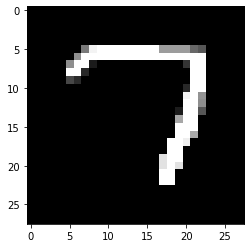

Output:  7

Prediction (Softmax) from the neural network:
 [[1.0097881e-03 3.7998635e-11 3.9735952e-01 8.1898172e-05 1.5691594e-09
  5.5132576e-11 6.6023451e-11 6.0154104e-01 7.6197798e-06 1.8569354e-07]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


Prediction


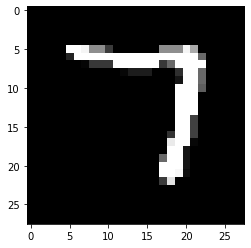

Output:  7

Prediction (Softmax) from the neural network:
 [[1.4493990e-04 7.3753827e-06 3.1863225e-01 3.8083977e-04 1.3173783e-07
  9.6229957e-09 3.0813427e-09 6.8080747e-01 2.6946298e-05 1.7035147e-08]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


Prediction


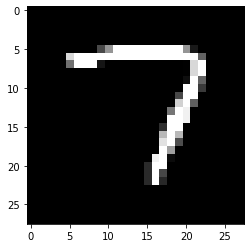

Output:  7

Prediction (Softmax) from the neural network:
 [[1.2218956e-06 1.7617135e-16 6.5976262e-02 3.2015982e-05 9.9699964e-09
  1.9015359e-14 6.3077690e-13 9.3396693e-01 2.3539955e-05 4.1737560e-09]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


Prediction


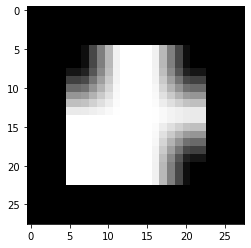

Output:  0

Prediction (Softmax) from the neural network:
 [[9.9451655e-01 2.8561674e-06 5.2426807e-03 2.3653949e-04 5.8566443e-11
  9.1304042e-10 9.0023796e-08 1.0457109e-08 3.8693375e-07 9.4737726e-07]]

Hard-maxed form of the prediction:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


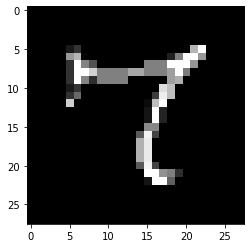

Output:  7

Prediction (Softmax) from the neural network:
 [[7.69404207e-10 8.69594369e-05 1.07251624e-04 1.98022872e-06
  9.72503221e-06 8.55879534e-06 5.92830618e-10 9.99782860e-01
  2.70163059e-06 2.29664638e-11]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


Prediction


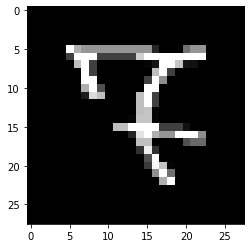

Output:  7

Prediction (Softmax) from the neural network:
 [[3.8610968e-15 1.5390003e-06 1.4051044e-04 3.1604641e-09 1.6690388e-08
  2.0531091e-08 4.7471524e-09 9.9985790e-01 3.0455714e-11 3.8804693e-15]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


Prediction


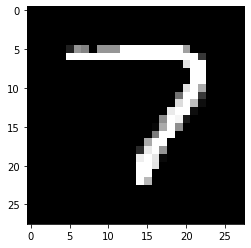

Output:  7

Prediction (Softmax) from the neural network:
 [[2.2492395e-04 4.1255836e-11 3.8301796e-02 2.6959889e-02 2.4013229e-08
  2.6835073e-12 8.6970694e-08 9.3405801e-01 4.5147631e-04 3.7079408e-06]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


Prediction


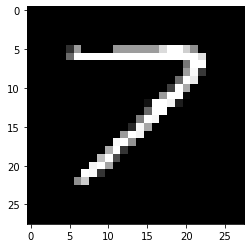

Output:  3

Prediction (Softmax) from the neural network:
 [[2.9295136e-15 1.7845383e-03 1.9019995e-03 6.6216820e-01 7.1975234e-12
  4.7924109e-11 1.5536845e-12 3.3413985e-01 5.3736144e-06 2.7849389e-09]]

Hard-maxed form of the prediction:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


Prediction


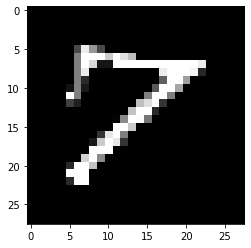

Output:  2

Prediction (Softmax) from the neural network:
 [[8.7442620e-14 1.5021668e-05 9.7310209e-01 2.3373231e-02 1.3458030e-11
  1.0083257e-06 8.1390092e-17 3.5076286e-03 9.9976171e-07 1.6916821e-12]]

Hard-maxed form of the prediction:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


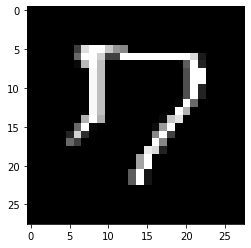

Output:  7

Prediction (Softmax) from the neural network:
 [[3.6238117e-07 1.8624239e-11 5.0113847e-08 6.5097483e-09 2.0788774e-07
  1.6746828e-08 8.1114273e-12 9.9996471e-01 3.4649100e-05 2.3261479e-09]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


Prediction


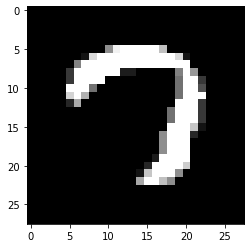

Output:  2

Prediction (Softmax) from the neural network:
 [[3.3564439e-01 2.9839657e-12 6.0365766e-01 2.0811762e-04 1.9261218e-13
  1.2609597e-09 1.2869645e-15 6.0460411e-02 4.2515240e-09 2.9420427e-05]]

Hard-maxed form of the prediction:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


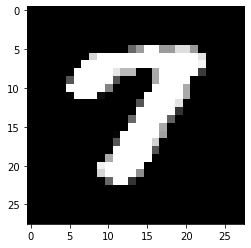

Output:  2

Prediction (Softmax) from the neural network:
 [[5.2601735e-07 1.0392858e-08 6.7233175e-01 2.9834995e-01 1.3198822e-14
  7.9511687e-14 4.0273486e-15 2.9316615e-02 1.1271716e-06 1.0269264e-09]]

Hard-maxed form of the prediction:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


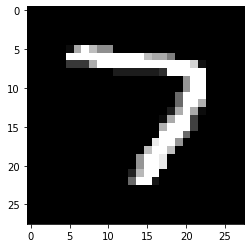

Output:  7

Prediction (Softmax) from the neural network:
 [[1.02979866e-04 9.04874591e-13 1.18289085e-03 2.03992720e-04
  3.06710962e-10 8.63017904e-12 1.35357093e-14 9.98509347e-01
  7.13019347e-07 1.21077226e-09]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


Prediction


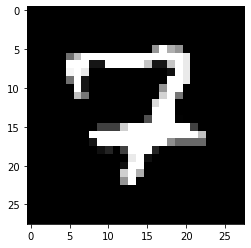

Output:  7

Prediction (Softmax) from the neural network:
 [[3.3838778e-19 1.9610453e-21 6.8282681e-03 1.9589161e-08 1.1633009e-12
  5.3126427e-15 4.9552244e-19 9.9317181e-01 2.4206419e-15 1.9496110e-13]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


Prediction


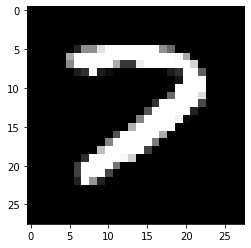

Output:  2

Prediction (Softmax) from the neural network:
 [[1.8476713e-11 5.4799686e-15 9.9911529e-01 8.7624311e-04 7.2403048e-16
  4.2775585e-19 2.2540174e-14 3.0027286e-06 5.5160622e-06 1.0952029e-09]]

Hard-maxed form of the prediction:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


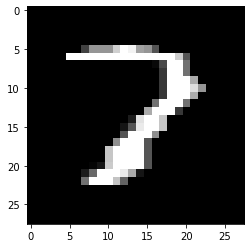

Output:  3

Prediction (Softmax) from the neural network:
 [[2.1604361e-11 4.5605419e-11 2.2513756e-05 9.9038249e-01 6.2833641e-13
  5.0563122e-17 7.5877063e-16 9.5943883e-03 5.8226180e-07 6.7262476e-12]]

Hard-maxed form of the prediction:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


Prediction


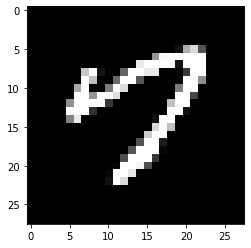

Output:  7

Prediction (Softmax) from the neural network:
 [[4.1838994e-06 1.4609670e-10 4.3508870e-04 4.0964749e-11 2.5529863e-07
  1.7042119e-08 9.6326861e-12 9.9956042e-01 1.5466320e-08 1.0819748e-11]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


Prediction


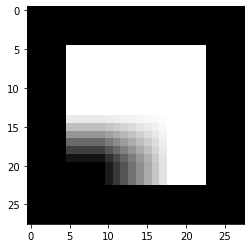

Output:  1

Prediction (Softmax) from the neural network:
 [[2.9621854e-01 3.2011279e-01 1.9568686e-01 5.9636805e-05 1.5528140e-02
  5.9773147e-06 9.0401340e-03 1.5419713e-04 1.6317903e-01 1.4688250e-05]]

Hard-maxed form of the prediction:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


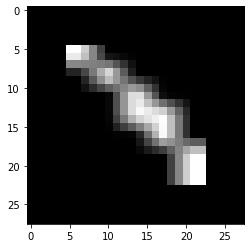

Output:  4

Prediction (Softmax) from the neural network:
 [[1.4353854e-07 5.1642809e-02 7.1653596e-04 3.9130922e-05 9.3861073e-01
  5.3102476e-06 2.2154381e-03 5.2632281e-04 6.2435605e-03 8.1738541e-08]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Prediction


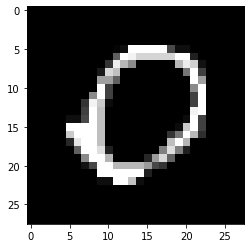

Output:  0

Prediction (Softmax) from the neural network:
 [[9.9962592e-01 2.5161329e-12 2.1912978e-04 7.7735307e-10 3.2465924e-12
  2.2691882e-10 1.6582117e-06 1.2955272e-09 8.8874344e-08 1.5316394e-04]]

Hard-maxed form of the prediction:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


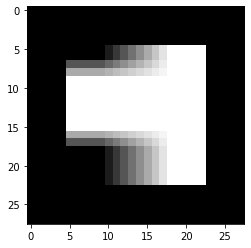

Output:  0

Prediction (Softmax) from the neural network:
 [[8.5188621e-01 1.2438606e-01 7.8617297e-03 9.1057433e-07 1.5129268e-02
  2.4382878e-06 2.6490330e-05 2.4688854e-05 5.6544435e-04 1.1682487e-04]]

Hard-maxed form of the prediction:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


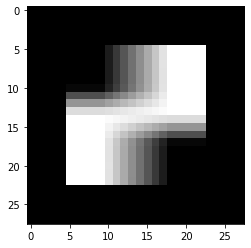

Output:  2

Prediction (Softmax) from the neural network:
 [[2.34601378e-01 2.28548795e-03 7.61347055e-01 1.38002750e-03
  1.15921772e-07 3.75134057e-09 5.03321862e-05 3.84701843e-06
  2.26786098e-04 1.04932195e-04]]

Hard-maxed form of the prediction:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


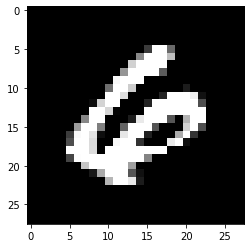

Output:  6

Prediction (Softmax) from the neural network:
 [[8.2827373e-06 3.0733567e-09 3.7593728e-07 1.3739009e-12 6.6101169e-09
  6.3128240e-12 9.9999118e-01 2.1633624e-09 4.2676632e-10 6.2013477e-08]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


Prediction


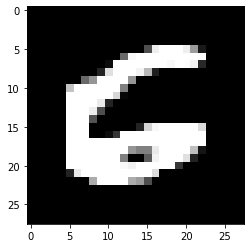

Output:  6

Prediction (Softmax) from the neural network:
 [[5.34812105e-04 6.95639726e-11 3.31542033e-05 1.55213328e-07
  1.62336016e-14 9.74207214e-05 9.99291182e-01 1.09435476e-07
  6.01571362e-11 4.31556255e-05]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


Prediction


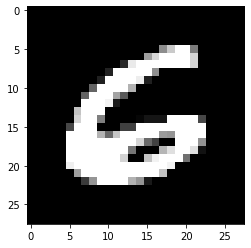

Output:  6

Prediction (Softmax) from the neural network:
 [[2.6612526e-09 4.2444232e-15 4.1405741e-09 3.0846170e-13 1.2015141e-14
  3.7637597e-07 9.9999964e-01 1.2331108e-17 2.7575985e-11 3.9442054e-11]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


Prediction


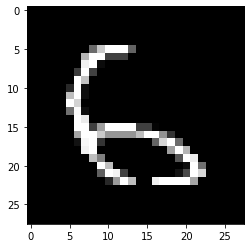

Output:  5

Prediction (Softmax) from the neural network:
 [[7.4911436e-06 5.3189712e-08 3.1022847e-04 2.0797649e-01 2.2919501e-04
  7.6173866e-01 2.8754385e-02 1.1304280e-07 9.6421107e-04 1.9166118e-05]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


Prediction


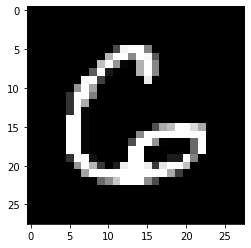

Output:  6

Prediction (Softmax) from the neural network:
 [[1.1893619e-04 4.0958947e-10 4.9327072e-03 2.5835248e-02 8.2171081e-15
  2.5944624e-10 9.6911299e-01 1.3485469e-07 2.6095073e-08 3.5390959e-09]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


Prediction


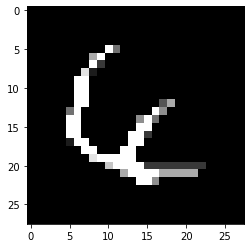

Output:  6

Prediction (Softmax) from the neural network:
 [[4.1783540e-05 1.6899594e-06 2.7304129e-03 2.8218619e-08 8.6456062e-03
  1.0316745e-07 9.8857749e-01 2.7535903e-06 7.6668421e-08 3.1496356e-08]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


Prediction


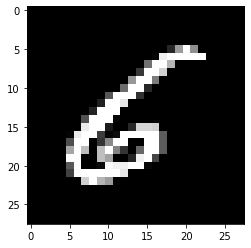

Output:  0

Prediction (Softmax) from the neural network:
 [[9.9991834e-01 2.8859802e-11 4.1691494e-11 1.0520932e-11 4.8402570e-11
  5.8234646e-06 7.5773205e-05 2.2549687e-14 1.3829947e-08 7.9452570e-11]]

Hard-maxed form of the prediction:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


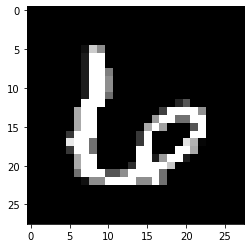

Output:  0

Prediction (Softmax) from the neural network:
 [[4.9127731e-01 2.9730268e-08 1.0824940e-04 7.0354838e-07 1.4449976e-01
  1.4495119e-05 3.6382180e-01 1.6327978e-05 2.6127169e-04 4.3983155e-09]]

Hard-maxed form of the prediction:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


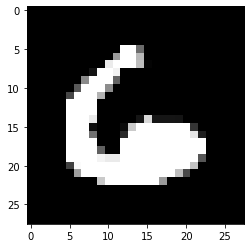

Output:  6

Prediction (Softmax) from the neural network:
 [[3.4857246e-03 1.9923701e-07 2.4947178e-05 3.3085793e-01 1.3836489e-10
  1.0261335e-06 6.6562998e-01 6.3526684e-10 1.1806990e-07 4.6462070e-09]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


Prediction


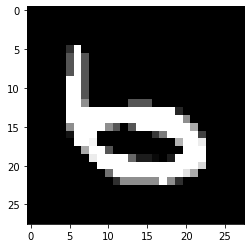

Output:  6

Prediction (Softmax) from the neural network:
 [[3.39085915e-08 1.15982694e-07 4.76868198e-11 1.49429440e-01
  5.78434879e-07 1.69131309e-01 6.81339383e-01 7.84488902e-13
  9.90561311e-05 6.49594484e-12]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


Prediction


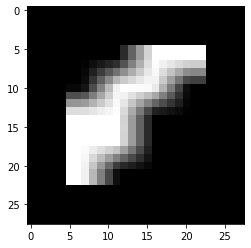

Output:  0

Prediction (Softmax) from the neural network:
 [[9.6495861e-01 1.1501652e-03 3.0052753e-02 4.0923807e-04 2.7195497e-06
  3.1767543e-06 7.0781138e-04 5.2208936e-05 1.0476828e-03 1.6155915e-03]]

Hard-maxed form of the prediction:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


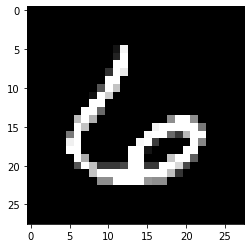

Output:  6

Prediction (Softmax) from the neural network:
 [[3.4497099e-03 2.4966280e-07 2.4294597e-05 2.4570099e-05 3.3451888e-06
  3.3694259e-06 9.9644428e-01 4.9481114e-05 5.7167352e-07 6.5154574e-14]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


Prediction


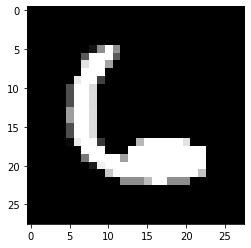

Output:  6

Prediction (Softmax) from the neural network:
 [[2.2915736e-02 6.3194645e-09 4.5941624e-06 3.6802120e-08 1.3162095e-04
  2.0557782e-05 9.7686076e-01 5.1012861e-09 6.6650937e-05 2.0732664e-08]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


Prediction


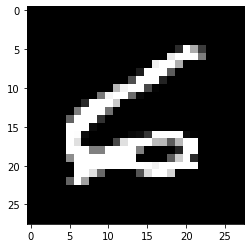

Output:  6

Prediction (Softmax) from the neural network:
 [[2.1585265e-04 3.6831261e-06 4.9327570e-04 8.8481965e-11 1.5270763e-07
  2.4316816e-07 9.9928647e-01 4.2299753e-10 2.9980018e-07 2.2653279e-12]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


Prediction


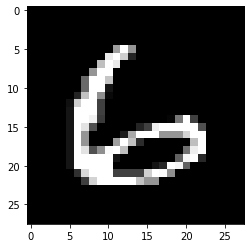

Output:  6

Prediction (Softmax) from the neural network:
 [[5.3844983e-03 5.1404154e-12 1.8107099e-04 2.1224691e-08 8.3626613e-12
  4.3198015e-10 9.9427116e-01 2.1622853e-11 1.6223051e-04 9.5586097e-07]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


Prediction


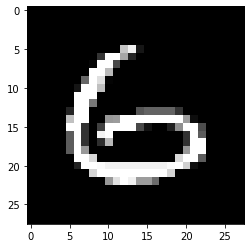

Output:  6

Prediction (Softmax) from the neural network:
 [[9.8063310e-06 3.0465994e-09 7.7470581e-08 4.7333869e-03 1.2167916e-09
  1.7961651e-06 9.9482709e-01 1.5076792e-12 6.8535228e-05 3.5928219e-04]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


Prediction


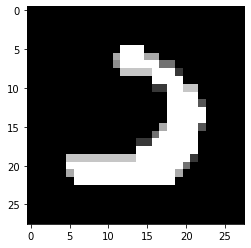

Output:  0

Prediction (Softmax) from the neural network:
 [[9.6854085e-01 1.4993586e-06 1.7773846e-02 1.3135010e-02 1.3161143e-15
  5.4840627e-04 7.1760953e-15 3.0505272e-09 1.6500149e-08 3.1475176e-07]]

Hard-maxed form of the prediction:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


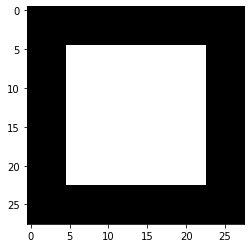

Output:  0

Prediction (Softmax) from the neural network:
 [[9.4350070e-01 8.7311650e-03 4.7753133e-02 7.3502433e-06 1.4682382e-10
  4.1045556e-10 3.0695180e-06 2.1640463e-10 4.5196598e-06 4.6794024e-10]]

Hard-maxed form of the prediction:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


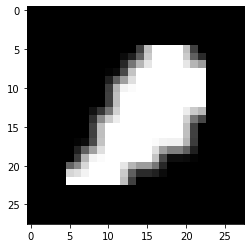

Output:  0

Prediction (Softmax) from the neural network:
 [[6.3796854e-01 3.6044690e-01 1.1907180e-03 2.2354034e-06 3.7418790e-08
  9.6661601e-08 2.4756689e-06 1.7229780e-08 3.8002653e-04 8.9480363e-06]]

Hard-maxed form of the prediction:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


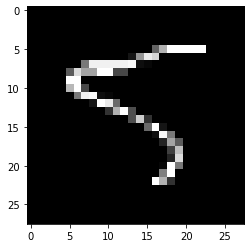

Output:  5

Prediction (Softmax) from the neural network:
 [[2.0784601e-09 1.0939222e-10 2.5382902e-09 2.4341651e-12 4.4605515e-09
  9.9999952e-01 6.8802456e-13 1.2622269e-07 2.9811289e-07 1.0586439e-12]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


Prediction


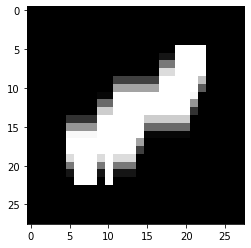

Output:  2

Prediction (Softmax) from the neural network:
 [[5.46473486e-04 9.38021840e-05 7.64013588e-01 5.00204806e-07
  2.31698290e-01 1.09101144e-07 2.14158485e-04 1.54583608e-06
  3.43121984e-03 2.83744299e-07]]

Hard-maxed form of the prediction:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


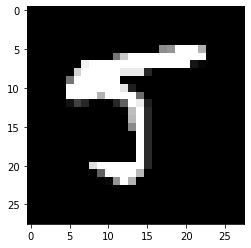

Output:  5

Prediction (Softmax) from the neural network:
 [[3.5691861e-14 3.0608949e-12 1.7454879e-14 6.3949917e-14 4.2983630e-20
  1.0000000e+00 8.7605859e-20 1.8031127e-10 2.9832900e-12 1.4546628e-09]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


Prediction


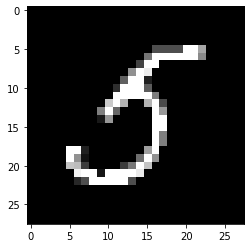

Output:  5

Prediction (Softmax) from the neural network:
 [[2.3118436e-11 2.0908844e-11 1.4587435e-14 2.9486380e-10 1.9329110e-15
  1.0000000e+00 1.8466655e-13 9.9301713e-12 2.7849726e-16 5.4857998e-09]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


Prediction


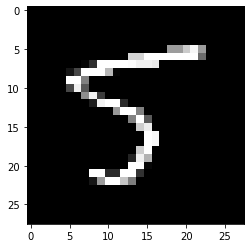

Output:  5

Prediction (Softmax) from the neural network:
 [[5.8409440e-15 2.2229097e-14 1.2387396e-18 4.3783423e-13 4.0187501e-17
  9.9999976e-01 2.3389076e-18 1.6060592e-11 2.3870977e-16 2.7466467e-07]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


Prediction


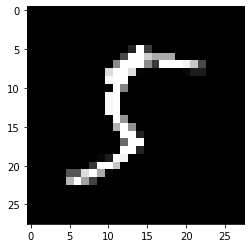

Output:  5

Prediction (Softmax) from the neural network:
 [[6.28673433e-11 3.10328858e-07 3.30091396e-13 5.33297310e-13
  1.01825076e-13 9.99999642e-01 1.28631101e-13 1.44563425e-13
  6.53285620e-11 4.42892167e-09]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


Prediction


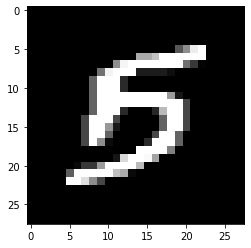

Output:  5

Prediction (Softmax) from the neural network:
 [[7.3487300e-08 8.7031944e-12 1.0462739e-14 8.1546125e-14 1.1933910e-13
  9.9999988e-01 3.4782262e-12 4.3504503e-08 6.1086349e-12 1.2512119e-09]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


Prediction


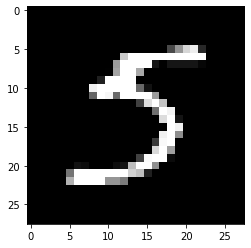

Output:  5

Prediction (Softmax) from the neural network:
 [[2.0898895e-13 6.8487045e-14 2.1445421e-19 6.4543809e-12 1.5918118e-18
  1.0000000e+00 3.3261505e-17 1.4093915e-09 1.9322411e-14 9.2818713e-12]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


Prediction


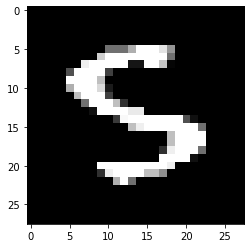

Output:  5

Prediction (Softmax) from the neural network:
 [[4.0663456e-20 9.5574414e-14 2.1037493e-13 9.1018120e-07 4.0763246e-16
  9.9999905e-01 1.1018122e-17 3.3289687e-15 1.2244133e-12 3.1901429e-11]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


Prediction


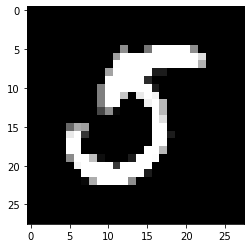

Output:  5

Prediction (Softmax) from the neural network:
 [[6.8217247e-08 9.1147567e-10 7.2725298e-11 1.9462718e-09 1.6693692e-18
  9.9999988e-01 5.0814400e-12 3.5587699e-11 7.8084140e-16 8.8186632e-11]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


Prediction


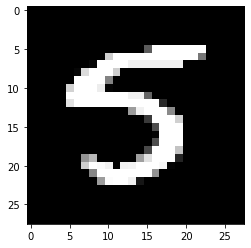

Output:  5

Prediction (Softmax) from the neural network:
 [[3.4863860e-18 2.2606521e-18 4.9712605e-20 1.0499494e-12 6.1091529e-22
  1.0000000e+00 6.9008060e-20 5.9708890e-15 1.6653828e-16 1.7649166e-12]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


Prediction


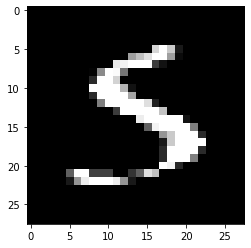

Output:  5

Prediction (Softmax) from the neural network:
 [[2.5448530e-18 6.1144584e-10 2.3593160e-15 6.1909780e-08 1.0373875e-14
  9.9999988e-01 4.6519600e-15 1.9038961e-14 1.2043148e-12 4.1450234e-09]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


Prediction


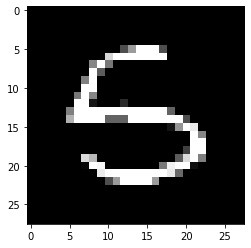

Output:  5

Prediction (Softmax) from the neural network:
 [[2.8680087e-18 2.2393320e-18 3.2589299e-18 3.5200664e-08 3.2824014e-16
  1.0000000e+00 7.8338096e-15 1.8480616e-12 1.2435996e-11 5.7390415e-10]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


Prediction


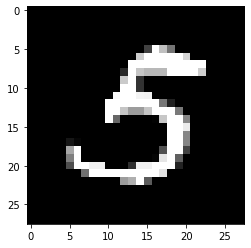

Output:  5

Prediction (Softmax) from the neural network:
 [[5.3721090e-16 4.9202882e-18 3.3788470e-20 4.3765398e-13 4.4969516e-21
  1.0000000e+00 2.6967078e-14 3.1314587e-22 2.4657682e-16 7.1593767e-13]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


Prediction


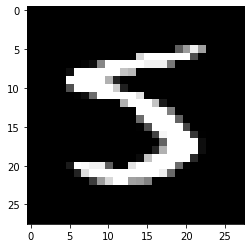

Output:  5

Prediction (Softmax) from the neural network:
 [[2.3767094e-19 7.5573109e-13 4.5656105e-20 6.0428745e-11 9.4984225e-22
  1.0000000e+00 2.2484362e-21 5.0713146e-15 1.1720412e-11 7.8859610e-12]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


Prediction


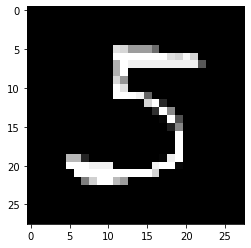

Output:  5

Prediction (Softmax) from the neural network:
 [[1.3230338e-13 4.7435675e-15 5.2230201e-16 5.7120491e-09 2.9082501e-21
  1.0000000e+00 5.4557888e-17 7.0628982e-18 4.6512729e-13 8.8497994e-12]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


Prediction


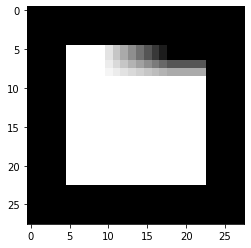

Output:  0

Prediction (Softmax) from the neural network:
 [[9.81185377e-01 5.31903934e-03 1.33766672e-02 1.32442456e-05
  8.99948773e-08 8.12243925e-08 7.97530593e-05 1.17815624e-07
  2.56366657e-05 4.08276035e-09]]

Hard-maxed form of the prediction:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


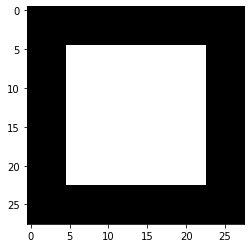

Output:  0

Prediction (Softmax) from the neural network:
 [[9.4350070e-01 8.7311650e-03 4.7753133e-02 7.3502433e-06 1.4682382e-10
  4.1045556e-10 3.0695180e-06 2.1640463e-10 4.5196598e-06 4.6794024e-10]]

Hard-maxed form of the prediction:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


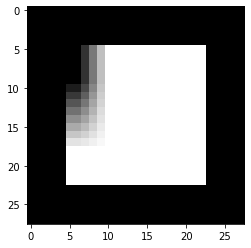

Output:  0

Prediction (Softmax) from the neural network:
 [[8.7653148e-01 4.4538501e-05 1.2342304e-01 6.3045195e-07 6.3480029e-12
  1.7733431e-11 2.0813260e-08 3.1868266e-14 2.7176858e-07 9.0265223e-10]]

Hard-maxed form of the prediction:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


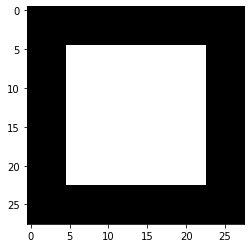

Output:  0

Prediction (Softmax) from the neural network:
 [[9.4350070e-01 8.7311650e-03 4.7753133e-02 7.3502433e-06 1.4682382e-10
  4.1045556e-10 3.0695180e-06 2.1640463e-10 4.5196598e-06 4.6794024e-10]]

Hard-maxed form of the prediction:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


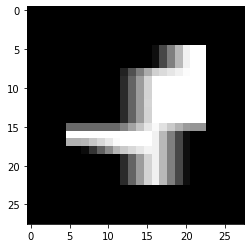

Output:  1

Prediction (Softmax) from the neural network:
 [[9.8377299e-05 7.5284404e-01 2.1330987e-01 6.9900394e-05 4.8847252e-04
  1.2654345e-03 1.7296677e-05 1.6189839e-03 2.0243784e-03 2.8263330e-02]]

Hard-maxed form of the prediction:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


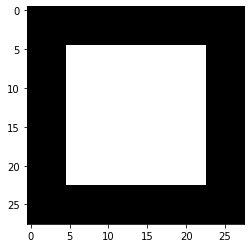

Output:  0

Prediction (Softmax) from the neural network:
 [[9.4350070e-01 8.7311650e-03 4.7753133e-02 7.3502433e-06 1.4682382e-10
  4.1045556e-10 3.0695180e-06 2.1640463e-10 4.5196598e-06 4.6794024e-10]]

Hard-maxed form of the prediction:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


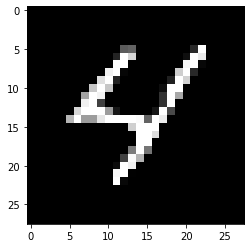

Output:  4

Prediction (Softmax) from the neural network:
 [[2.2932719e-14 3.6456945e-11 3.6351486e-14 1.2267169e-16 1.0000000e+00
  4.0423820e-10 9.6687315e-17 1.8521659e-08 5.7494307e-09 1.8168198e-08]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Prediction


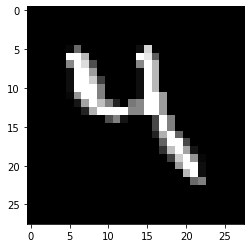

Output:  4

Prediction (Softmax) from the neural network:
 [[4.4822158e-12 6.2956352e-04 1.3946524e-07 3.9016243e-07 9.9935323e-01
  2.3203513e-07 8.9310200e-12 2.8823916e-07 1.6180398e-05 4.5459347e-09]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Prediction


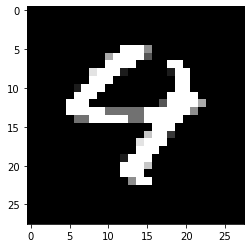

Output:  4

Prediction (Softmax) from the neural network:
 [[2.4859514e-09 5.4982528e-14 6.4961708e-10 3.6626474e-10 9.9660707e-01
  8.4381685e-07 1.3896631e-12 3.6222973e-06 2.6642736e-03 7.2418799e-04]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Prediction


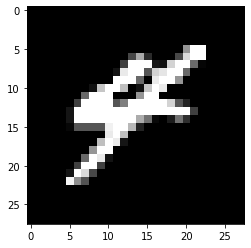

Output:  5

Prediction (Softmax) from the neural network:
 [[1.7666192e-10 1.1545246e-02 8.0847711e-09 1.6526682e-09 3.3955779e-03
  9.8451519e-01 1.3418887e-09 4.0261101e-04 1.4143756e-04 3.7212706e-09]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


Prediction


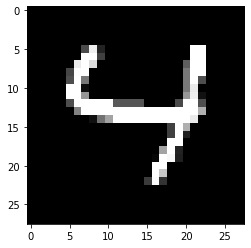

Output:  4

Prediction (Softmax) from the neural network:
 [[5.6146788e-14 4.6336540e-16 2.2719322e-12 9.0988374e-16 9.9998665e-01
  1.3164427e-05 2.7118022e-16 3.5201636e-10 1.8224502e-07 4.7535850e-11]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Prediction


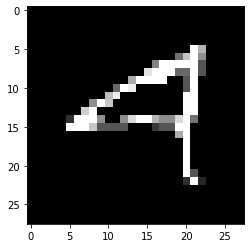

Output:  4

Prediction (Softmax) from the neural network:
 [[1.23856908e-05 1.41364054e-09 1.01088426e-06 2.46692353e-15
  9.99331236e-01 6.51390059e-04 1.23041275e-07 1.12882245e-10
  3.01416344e-06 7.98446877e-07]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Prediction


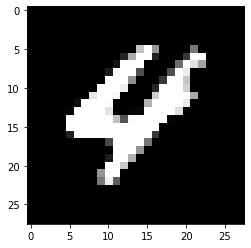

Output:  4

Prediction (Softmax) from the neural network:
 [[4.3738690e-11 2.2025792e-09 2.9170194e-13 3.6807941e-18 9.9999893e-01
  1.8808170e-13 2.2826345e-14 3.5729694e-10 7.7506024e-07 3.0901177e-07]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Prediction


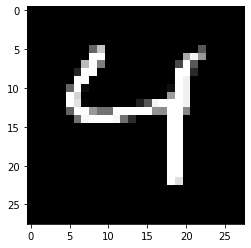

Output:  4

Prediction (Softmax) from the neural network:
 [[6.8996545e-18 1.3047486e-15 5.1034693e-16 4.7409784e-16 1.0000000e+00
  1.3896265e-11 2.8905881e-20 1.0592489e-15 9.7771548e-11 4.5926469e-14]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Prediction


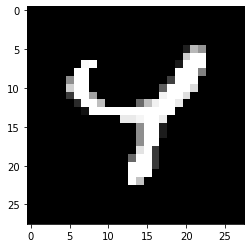

Output:  4

Prediction (Softmax) from the neural network:
 [[4.2244794e-13 1.0548854e-08 2.3554799e-08 3.9836898e-10 9.8607868e-01
  2.2702418e-09 1.2700298e-15 7.2413314e-07 1.3899924e-02 2.0683172e-05]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Prediction


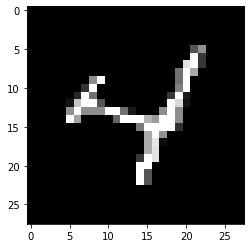

Output:  4

Prediction (Softmax) from the neural network:
 [[1.5349519e-11 2.4357652e-10 9.2105452e-09 3.1177417e-12 9.9999952e-01
  3.1936060e-09 3.6285127e-13 3.5629441e-08 4.4084544e-07 1.0662675e-12]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Prediction


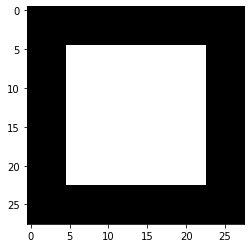

Output:  0

Prediction (Softmax) from the neural network:
 [[9.4350070e-01 8.7311650e-03 4.7753133e-02 7.3502433e-06 1.4682382e-10
  4.1045556e-10 3.0695180e-06 2.1640463e-10 4.5196598e-06 4.6794024e-10]]

Hard-maxed form of the prediction:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


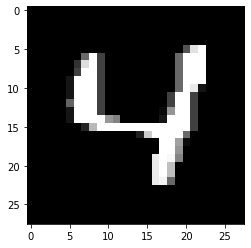

Output:  4

Prediction (Softmax) from the neural network:
 [[8.05668517e-15 3.18543545e-14 1.64282622e-15 3.16107226e-19
  1.00000000e+00 2.86901319e-12 1.05829514e-16 4.87054480e-16
  1.13351016e-10 2.87973380e-14]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Prediction


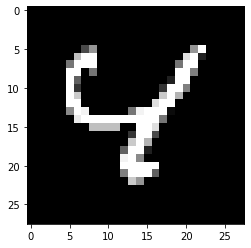

Output:  4

Prediction (Softmax) from the neural network:
 [[8.73661546e-19 5.85064690e-08 8.38844438e-10 1.00130895e-13
  9.99987125e-01 5.35453233e-14 5.31394921e-17 7.74418189e-16
  1.28870661e-05 5.54946883e-14]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Prediction


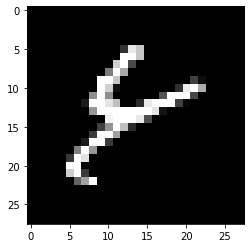

Output:  8

Prediction (Softmax) from the neural network:
 [[1.0873739e-13 1.0468075e-08 3.3512968e-09 9.0365793e-06 2.6669749e-04
  4.0108897e-03 5.0753307e-10 1.5714643e-09 9.9571323e-01 1.5801460e-07]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Prediction


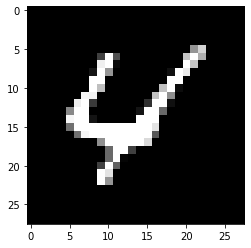

Output:  4

Prediction (Softmax) from the neural network:
 [[2.31948876e-15 3.53343066e-09 1.02921794e-11 1.02542576e-16
  1.00000000e+00 8.21957384e-14 1.57773759e-11 2.20191376e-09
  2.24470775e-10 8.05333922e-14]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Prediction


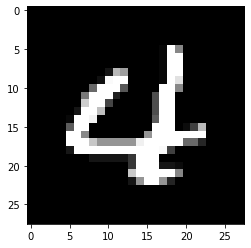

Output:  4

Prediction (Softmax) from the neural network:
 [[3.4276777e-08 1.0558679e-10 5.0244811e-03 1.9419343e-14 9.9497449e-01
  4.6633899e-15 9.1166928e-11 1.1220144e-06 2.6119387e-13 1.6619309e-10]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Prediction


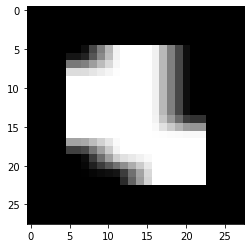

Output:  0

Prediction (Softmax) from the neural network:
 [[8.2852179e-01 2.1455796e-03 7.8452289e-02 4.3356427e-04 8.3410330e-02
  1.4483462e-06 1.9632992e-03 5.4761156e-05 4.9161068e-03 1.0092358e-04]]

Hard-maxed form of the prediction:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


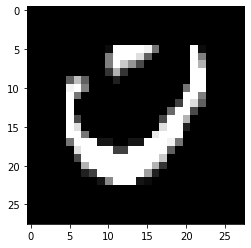

Output:  0

Prediction (Softmax) from the neural network:
 [[9.9630761e-01 4.2409786e-07 1.7741311e-06 3.5419365e-07 4.2915985e-06
  2.4485553e-06 6.5136710e-06 3.6726075e-03 1.2981434e-07 3.8510675e-06]]

Hard-maxed form of the prediction:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


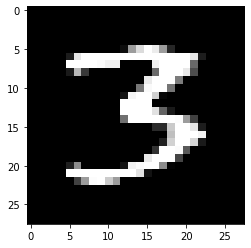

Output:  3

Prediction (Softmax) from the neural network:
 [[2.3439791e-20 3.0235839e-20 2.8830988e-13 1.0000000e+00 3.6751163e-18
  1.3916848e-11 3.0245360e-16 1.1197553e-14 6.0797849e-16 7.1160731e-16]]

Hard-maxed form of the prediction:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


Prediction


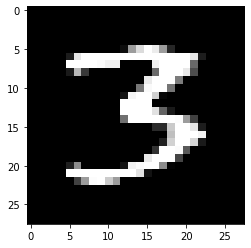

Output:  3

Prediction (Softmax) from the neural network:
 [[2.3439791e-20 3.0235839e-20 2.8830988e-13 1.0000000e+00 3.6751163e-18
  1.3916848e-11 3.0245360e-16 1.1197553e-14 6.0797849e-16 7.1160731e-16]]

Hard-maxed form of the prediction:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


Prediction


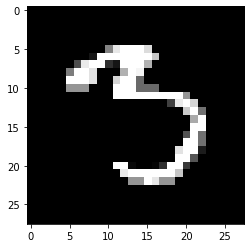

Output:  3

Prediction (Softmax) from the neural network:
 [[1.11004425e-04 5.84075899e-09 6.69712099e-05 9.93668020e-01
  1.23754665e-14 5.14629390e-03 2.48906035e-10 1.00776309e-03
  1.06679188e-09 1.14781191e-10]]

Hard-maxed form of the prediction:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


Prediction


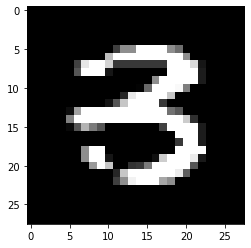

Output:  3

Prediction (Softmax) from the neural network:
 [[7.2860800e-15 8.3481484e-15 2.2383684e-09 9.9999988e-01 2.8772967e-21
  6.8534682e-08 4.1919999e-15 5.8714109e-09 7.0671060e-09 1.3475850e-13]]

Hard-maxed form of the prediction:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


Prediction


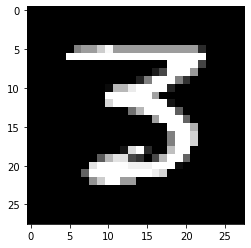

Output:  3

Prediction (Softmax) from the neural network:
 [[1.3739005e-15 2.8087223e-16 9.9633758e-15 1.0000000e+00 2.1452786e-19
  1.8898054e-09 6.5890730e-18 6.3690191e-09 1.0706578e-12 4.1414371e-16]]

Hard-maxed form of the prediction:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


Prediction


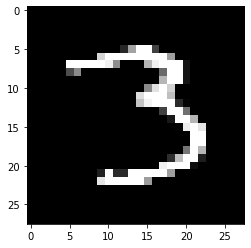

Output:  3

Prediction (Softmax) from the neural network:
 [[4.8195912e-15 1.3935133e-17 2.2963294e-12 1.0000000e+00 5.4195044e-19
  3.4331350e-17 3.1046907e-18 5.4530276e-11 1.1224404e-15 5.4501276e-18]]

Hard-maxed form of the prediction:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


Prediction


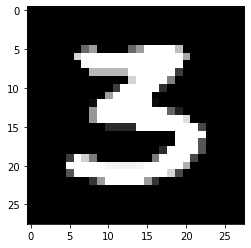

Output:  3

Prediction (Softmax) from the neural network:
 [[8.6203251e-20 1.3017055e-12 8.1153837e-15 1.0000000e+00 1.2792226e-18
  2.1483113e-09 4.5987739e-18 8.4498529e-20 6.4309770e-14 1.7513219e-16]]

Hard-maxed form of the prediction:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


Prediction


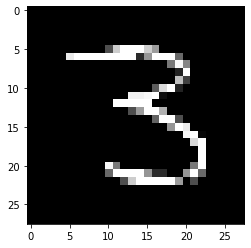

Output:  3

Prediction (Softmax) from the neural network:
 [[7.6712455e-16 1.9252486e-17 4.5236295e-13 1.0000000e+00 2.4765477e-20
  2.4252115e-13 6.4812859e-16 1.0413932e-12 2.1230647e-12 1.8404597e-16]]

Hard-maxed form of the prediction:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


Prediction


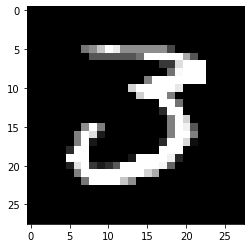

Output:  3

Prediction (Softmax) from the neural network:
 [[2.3635265e-09 2.4378445e-14 1.6784803e-05 9.9998319e-01 1.4912764e-18
  4.5098759e-08 1.9093673e-13 4.3196381e-11 1.2153745e-10 1.4081952e-14]]

Hard-maxed form of the prediction:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


Prediction


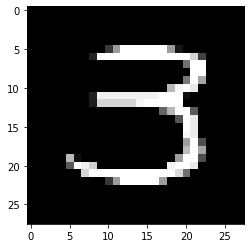

Output:  3

Prediction (Softmax) from the neural network:
 [[1.5631478e-14 3.5625474e-18 4.0691571e-13 1.0000000e+00 3.4996451e-25
  3.6827883e-09 2.9488146e-20 9.7993444e-09 1.2728345e-13 3.2116854e-11]]

Hard-maxed form of the prediction:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


Prediction


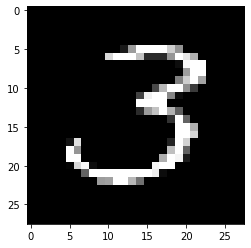

Output:  3

Prediction (Softmax) from the neural network:
 [[3.1489207e-09 3.6639553e-13 4.8084526e-06 9.9984372e-01 1.3817221e-14
  1.4390444e-04 3.5391037e-09 1.2980087e-07 7.5552052e-06 2.1999995e-09]]

Hard-maxed form of the prediction:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


Prediction


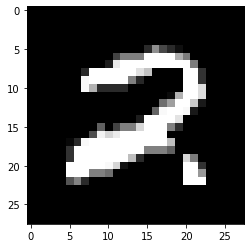

Output:  2

Prediction (Softmax) from the neural network:
 [[7.4167344e-10 1.3655400e-15 9.9999976e-01 2.1813563e-08 3.9926631e-11
  3.9465737e-16 2.0125933e-16 2.6003366e-07 8.3919105e-10 1.3493968e-11]]

Hard-maxed form of the prediction:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


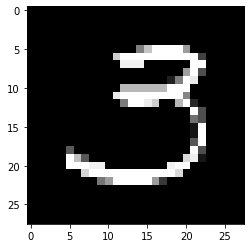

Output:  3

Prediction (Softmax) from the neural network:
 [[4.7213927e-10 1.9803978e-12 3.0714643e-11 9.9999619e-01 3.3712054e-24
  3.7990317e-06 9.6212365e-16 6.1644515e-13 1.2717552e-12 9.0606428e-10]]

Hard-maxed form of the prediction:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


Prediction


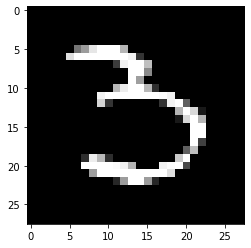

Output:  3

Prediction (Softmax) from the neural network:
 [[9.8040777e-12 2.3887854e-11 7.9836955e-09 9.9999809e-01 3.7185739e-17
  5.0419548e-08 1.8471146e-11 1.9652698e-06 1.2023742e-14 5.2409744e-15]]

Hard-maxed form of the prediction:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


Prediction


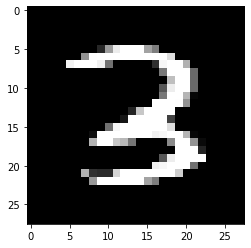

Output:  3

Prediction (Softmax) from the neural network:
 [[2.3129676e-23 2.0962687e-21 1.8996768e-11 1.0000000e+00 5.8798738e-20
  8.9556400e-23 2.2412214e-25 4.6705888e-14 1.2145772e-13 2.9138554e-15]]

Hard-maxed form of the prediction:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


Prediction


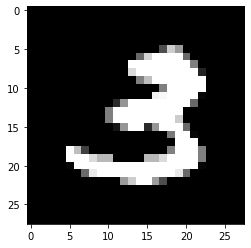

Output:  3

Prediction (Softmax) from the neural network:
 [[2.1857097e-15 5.1980972e-15 8.0459586e-13 1.0000000e+00 5.3344679e-18
  2.8059692e-09 5.8725725e-18 9.6024392e-21 1.0880701e-12 8.5679006e-13]]

Hard-maxed form of the prediction:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


Prediction


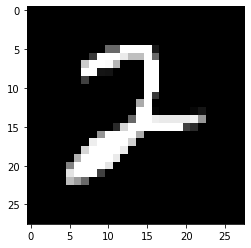

Output:  7

Prediction (Softmax) from the neural network:
 [[2.0954202e-15 1.3415981e-06 4.0334809e-01 9.4360547e-07 1.2197433e-09
  5.4682737e-16 6.2201768e-13 5.9664929e-01 3.8088038e-07 4.2520997e-11]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


Prediction


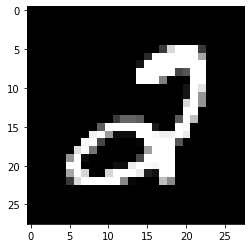

Output:  2

Prediction (Softmax) from the neural network:
 [[1.3956415e-07 1.2628149e-09 9.9987304e-01 9.5514139e-09 1.6260956e-12
  5.0781491e-05 3.5039088e-10 4.9634349e-14 7.6077638e-05 2.6951213e-10]]

Hard-maxed form of the prediction:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


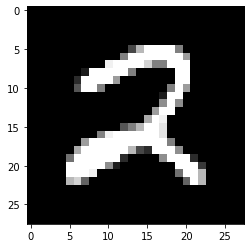

Output:  2

Prediction (Softmax) from the neural network:
 [[2.6749307e-18 7.7881094e-13 1.0000000e+00 3.4139491e-10 5.2580814e-17
  1.5664569e-19 1.3496125e-20 3.2007974e-09 3.4899906e-11 1.2270685e-15]]

Hard-maxed form of the prediction:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


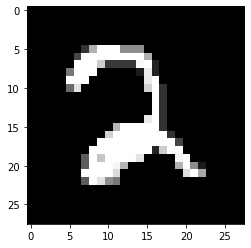

Output:  2

Prediction (Softmax) from the neural network:
 [[1.6878786e-12 2.2134820e-10 9.9999905e-01 1.0016827e-06 1.3441280e-14
  3.5171227e-16 4.4301818e-15 1.2537975e-10 4.0442674e-10 1.8699512e-12]]

Hard-maxed form of the prediction:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


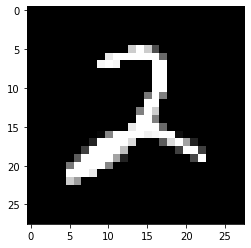

Output:  2

Prediction (Softmax) from the neural network:
 [[1.0689804e-16 6.5080469e-11 9.9841619e-01 1.7427563e-05 3.5711997e-15
  2.0478024e-17 5.3711941e-17 1.5663230e-03 3.7644480e-08 4.2926468e-11]]

Hard-maxed form of the prediction:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


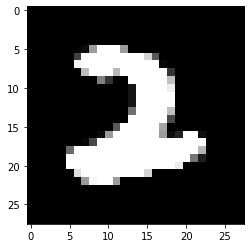

Output:  2

Prediction (Softmax) from the neural network:
 [[3.8451214e-10 7.3943722e-09 9.9949360e-01 5.0634460e-04 1.1915043e-17
  3.6453981e-15 8.1891082e-19 1.0801308e-12 5.2135869e-09 2.9222653e-13]]

Hard-maxed form of the prediction:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


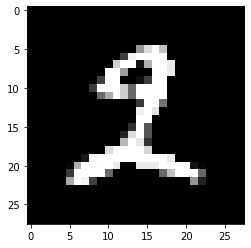

Output:  2

Prediction (Softmax) from the neural network:
 [[2.0301323e-17 1.2102050e-06 9.9999881e-01 2.5891192e-11 2.6313303e-16
  1.5670633e-13 1.0326453e-20 1.8047097e-11 4.8567128e-10 1.2366669e-12]]

Hard-maxed form of the prediction:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


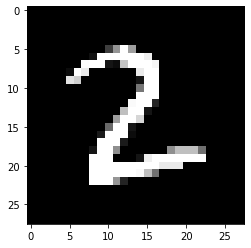

Output:  2

Prediction (Softmax) from the neural network:
 [[4.8766315e-09 5.5104445e-09 1.0000000e+00 1.3876930e-11 2.3048843e-21
  5.1131996e-21 6.1279777e-18 4.4305579e-15 1.0048666e-10 3.3678509e-16]]

Hard-maxed form of the prediction:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


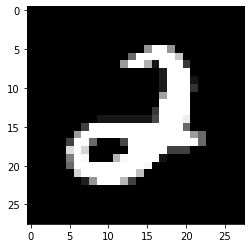

Output:  2

Prediction (Softmax) from the neural network:
 [[1.5287503e-10 4.6126629e-14 1.0000000e+00 5.7292912e-12 3.1020864e-14
  1.1204090e-14 9.8958439e-14 6.2264657e-13 4.2969968e-11 2.3711165e-12]]

Hard-maxed form of the prediction:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


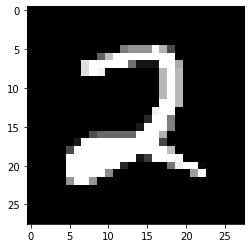

Output:  2

Prediction (Softmax) from the neural network:
 [[2.6271137e-14 7.9238016e-13 1.0000000e+00 2.9018704e-11 4.8493655e-19
  3.7085352e-18 1.6719177e-19 6.7169217e-09 7.5670539e-11 4.1140549e-16]]

Hard-maxed form of the prediction:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


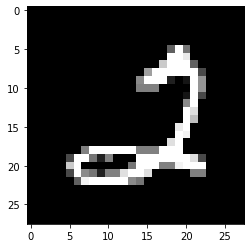

Output:  0

Prediction (Softmax) from the neural network:
 [[4.87081647e-01 4.84320242e-03 2.93937087e-01 1.17477375e-05
  2.01048138e-08 2.13796422e-01 1.31623253e-07 5.38923420e-11
  2.90917407e-04 3.87304863e-05]]

Hard-maxed form of the prediction:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


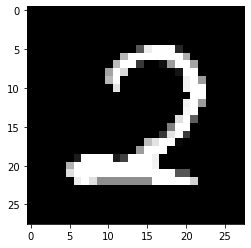

Output:  2

Prediction (Softmax) from the neural network:
 [[1.6476804e-08 3.1143603e-09 1.0000000e+00 5.2768501e-09 1.4443304e-14
  7.3176117e-15 2.1646967e-18 6.9337582e-14 2.9023322e-13 8.3701684e-11]]

Hard-maxed form of the prediction:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


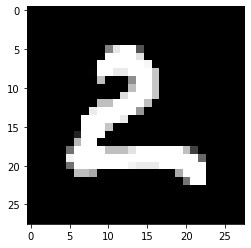

Output:  2

Prediction (Softmax) from the neural network:
 [[3.7037491e-05 1.2938214e-05 9.9994946e-01 2.0227127e-09 5.4205032e-07
  1.6214717e-12 7.1169465e-13 4.7548432e-14 7.5056683e-11 1.7353781e-10]]

Hard-maxed form of the prediction:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


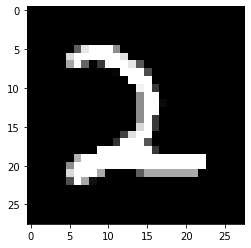

Output:  2

Prediction (Softmax) from the neural network:
 [[2.20443977e-16 1.16173204e-07 9.99999881e-01 7.85440424e-09
  1.92614100e-13 6.00761757e-18 8.69755495e-19 1.25589275e-10
  5.72749245e-14 3.91526008e-18]]

Hard-maxed form of the prediction:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


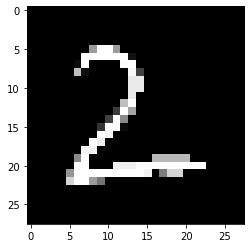

Output:  2

Prediction (Softmax) from the neural network:
 [[1.0888606e-13 8.0980733e-03 9.9190193e-01 1.3628344e-11 2.6072359e-18
  1.2431988e-15 8.5301029e-17 8.0849254e-13 1.2335771e-09 3.1025114e-22]]

Hard-maxed form of the prediction:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


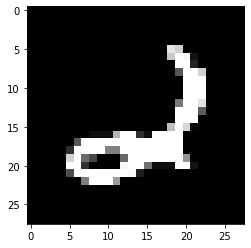

Output:  2

Prediction (Softmax) from the neural network:
 [[5.1053576e-02 3.6924382e-04 9.4855171e-01 1.9418989e-09 1.4079270e-06
  6.6096500e-10 1.9883137e-09 1.6830643e-07 2.3894812e-05 1.9186738e-10]]

Hard-maxed form of the prediction:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


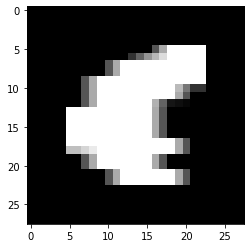

Output:  2

Prediction (Softmax) from the neural network:
 [[1.7023805e-04 1.2291865e-04 7.2895825e-01 4.0137349e-04 9.5335374e-05
  3.0081932e-04 1.7316273e-03 1.2151516e-03 2.6671231e-01 2.9196613e-04]]

Hard-maxed form of the prediction:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


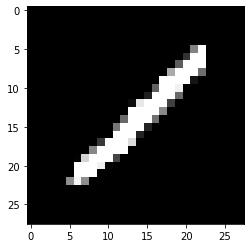

Output:  1

Prediction (Softmax) from the neural network:
 [[4.1038556e-16 9.9999726e-01 2.8005493e-06 2.2464489e-14 3.2383191e-10
  3.3306495e-09 1.5006193e-14 3.3314354e-10 1.3576353e-09 3.1960784e-13]]

Hard-maxed form of the prediction:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


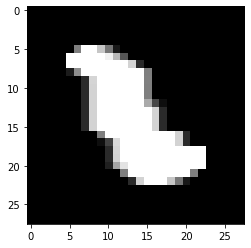

Output:  2

Prediction (Softmax) from the neural network:
 [[7.0216949e-05 4.7604870e-03 7.4853349e-01 1.3667512e-01 1.6658131e-02
  3.3278161e-06 4.0070463e-05 2.8256456e-05 9.3220279e-02 1.0648493e-05]]

Hard-maxed form of the prediction:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


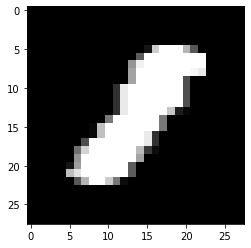

Output:  0

Prediction (Softmax) from the neural network:
 [[7.1947825e-01 2.6239184e-01 2.3973025e-04 9.7413920e-07 8.7327557e-08
  1.1861754e-05 7.6834073e-07 1.0713606e-07 1.7812682e-02 6.3680862e-05]]

Hard-maxed form of the prediction:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


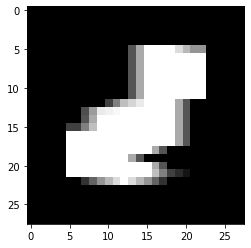

Output:  2

Prediction (Softmax) from the neural network:
 [[1.29563132e-05 1.19924394e-07 9.99695659e-01 2.74244754e-04
  1.28119196e-10 2.81103896e-09 1.27095015e-10 1.23569635e-11
  1.70367148e-05 3.60462376e-12]]

Hard-maxed form of the prediction:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


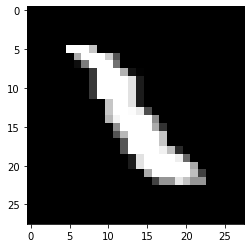

Output:  1

Prediction (Softmax) from the neural network:
 [[4.5613090e-11 9.9992836e-01 5.3420466e-05 4.3013124e-08 1.4723084e-05
  1.7750047e-09 2.8636293e-07 2.5972585e-07 2.8406657e-06 6.1056972e-11]]

Hard-maxed form of the prediction:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


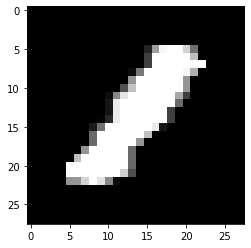

Output:  1

Prediction (Softmax) from the neural network:
 [[4.3735648e-07 9.9997497e-01 1.7897818e-08 2.7567024e-09 5.9207912e-07
  6.3889956e-09 3.3514114e-10 5.6912051e-11 2.3871018e-05 1.1406415e-07]]

Hard-maxed form of the prediction:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


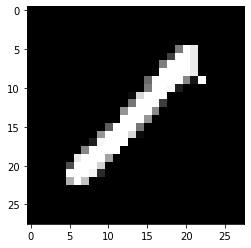

Output:  1

Prediction (Softmax) from the neural network:
 [[2.4136338e-13 9.9993336e-01 6.1835723e-05 9.7114092e-13 8.6245349e-09
  3.8456765e-06 2.5692020e-09 5.9642463e-10 9.4971364e-07 1.9239220e-11]]

Hard-maxed form of the prediction:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


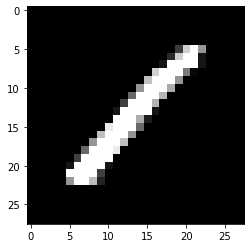

Output:  1

Prediction (Softmax) from the neural network:
 [[2.2954391e-14 9.9999857e-01 1.4734982e-06 2.6188151e-14 7.8916075e-12
  4.4036241e-08 9.2870343e-11 1.2691703e-12 2.7107891e-09 8.9324908e-16]]

Hard-maxed form of the prediction:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


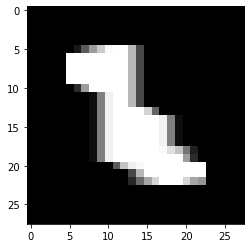

Output:  2

Prediction (Softmax) from the neural network:
 [[6.3606902e-05 1.6497565e-03 8.2512140e-01 1.7198834e-03 1.1358227e-02
  3.1003518e-05 4.3787956e-02 2.1293852e-06 1.1626354e-01 2.5330396e-06]]

Hard-maxed form of the prediction:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


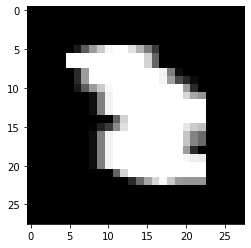

Output:  2

Prediction (Softmax) from the neural network:
 [[1.8511887e-04 3.5997627e-06 9.9946278e-01 3.3519561e-07 1.1795831e-05
  2.2497270e-11 4.5625697e-07 2.2473074e-08 3.3582674e-04 1.1448452e-08]]

Hard-maxed form of the prediction:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


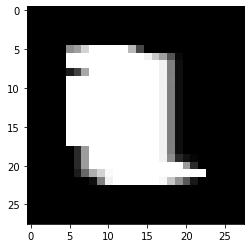

Output:  2

Prediction (Softmax) from the neural network:
 [[8.8207766e-05 2.3305947e-06 9.9969864e-01 2.1019700e-04 1.1943972e-10
  6.1499771e-11 1.4056704e-09 9.6711169e-08 5.7180500e-07 2.8901572e-09]]

Hard-maxed form of the prediction:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


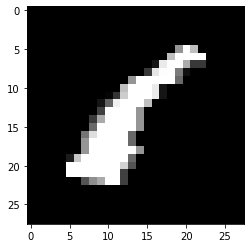

Output:  5

Prediction (Softmax) from the neural network:
 [[7.7048078e-02 9.2024006e-02 8.2347186e-05 6.1614929e-07 1.8120067e-02
  7.9025865e-01 1.4625025e-02 7.0208034e-06 7.7977017e-03 3.6595673e-05]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


Prediction


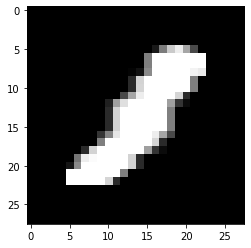

Output:  1

Prediction (Softmax) from the neural network:
 [[3.2175967e-04 9.9851757e-01 6.8480300e-04 1.0953304e-06 2.5277021e-07
  2.1398214e-06 2.1970692e-09 2.9357112e-09 4.7213340e-04 3.5477012e-07]]

Hard-maxed form of the prediction:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


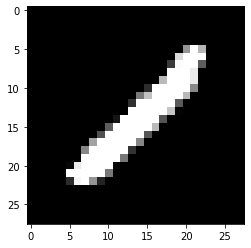

Output:  1

Prediction (Softmax) from the neural network:
 [[1.1118926e-15 9.9999976e-01 6.7964635e-08 6.8622073e-11 5.9885097e-11
  9.7523346e-13 6.8834600e-14 7.7754102e-11 6.0372024e-08 2.3512361e-13]]

Hard-maxed form of the prediction:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


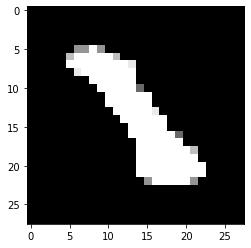

Output:  1

Prediction (Softmax) from the neural network:
 [[4.2624626e-11 9.9984229e-01 6.5217330e-07 4.6128978e-05 4.1562649e-05
  5.6549052e-08 1.8810742e-10 1.7430607e-06 6.7531648e-05 1.9258900e-08]]

Hard-maxed form of the prediction:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


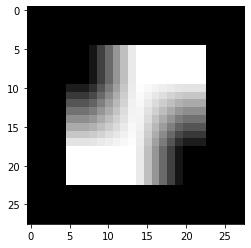

Output:  0

Prediction (Softmax) from the neural network:
 [[9.6187919e-01 8.9996312e-05 3.7758131e-02 2.6854948e-04 5.6164171e-12
  1.5367588e-08 1.7043405e-07 2.7402977e-10 3.3329977e-06 6.7886793e-07]]

Hard-maxed form of the prediction:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


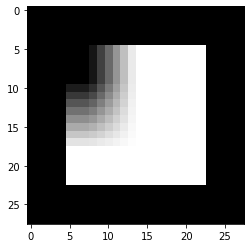

Output:  0

Prediction (Softmax) from the neural network:
 [[9.7896808e-01 1.7948971e-04 2.0852409e-02 4.8388923e-08 4.9373786e-13
  1.3012752e-12 1.3340844e-08 3.0240293e-14 4.2706173e-08 2.8094357e-10]]

Hard-maxed form of the prediction:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


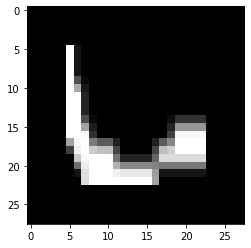

Output:  6

Prediction (Softmax) from the neural network:
 [[3.0906661e-03 7.5884447e-05 1.0171054e-04 2.5893305e-06 1.1886812e-06
  2.0480626e-05 9.9670547e-01 2.0596551e-06 4.0520240e-09 3.5715550e-10]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


Prediction


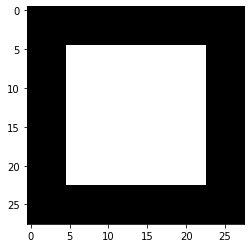

Output:  0

Prediction (Softmax) from the neural network:
 [[9.4350070e-01 8.7311650e-03 4.7753133e-02 7.3502433e-06 1.4682382e-10
  4.1045556e-10 3.0695180e-06 2.1640463e-10 4.5196598e-06 4.6794024e-10]]

Hard-maxed form of the prediction:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


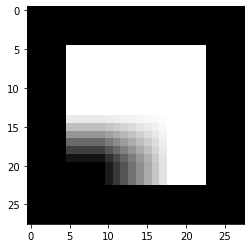

Output:  1

Prediction (Softmax) from the neural network:
 [[2.9621854e-01 3.2011279e-01 1.9568686e-01 5.9636805e-05 1.5528140e-02
  5.9773147e-06 9.0401340e-03 1.5419713e-04 1.6317903e-01 1.4688250e-05]]

Hard-maxed form of the prediction:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


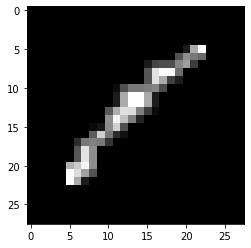

Output:  5

Prediction (Softmax) from the neural network:
 [[2.2754554e-07 2.3344550e-02 3.2864939e-04 1.7387149e-08 5.3988706e-04
  9.7417635e-01 6.9758180e-06 1.9177948e-07 1.6027384e-03 4.1026101e-07]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


Prediction


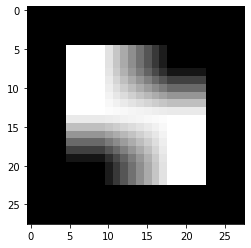

Output:  4

Prediction (Softmax) from the neural network:
 [[3.3940203e-03 5.4169036e-03 2.9146329e-03 1.5102908e-06 9.4804710e-01
  2.1997110e-05 2.2700625e-02 3.0170665e-03 1.4484861e-02 1.3208162e-06]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Prediction


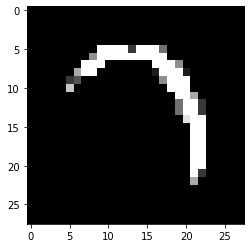

Output:  2

Prediction (Softmax) from the neural network:
 [[1.9595480e-02 2.8902903e-08 9.5779663e-01 4.1249255e-04 5.1274048e-07
  5.2845481e-11 4.6725991e-11 2.2194827e-02 5.0896059e-08 3.5557754e-08]]

Hard-maxed form of the prediction:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


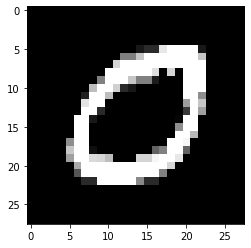

Output:  0

Prediction (Softmax) from the neural network:
 [[9.99999881e-01 7.51069061e-14 4.45630111e-09 6.18638296e-09
  1.10884256e-16 1.84708804e-09 1.73812342e-09 1.40256093e-13
  4.12617293e-12 1.39802466e-07]]

Hard-maxed form of the prediction:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


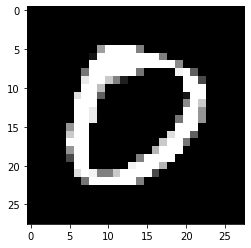

Output:  0

Prediction (Softmax) from the neural network:
 [[1.00000000e+00 1.23728180e-16 8.23354362e-09 4.35449760e-10
  1.77997570e-14 1.08129720e-11 8.02746064e-12 3.32904548e-09
  1.00338566e-11 1.59493707e-09]]

Hard-maxed form of the prediction:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


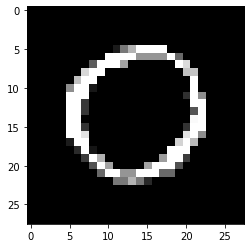

Output:  0

Prediction (Softmax) from the neural network:
 [[9.9999976e-01 1.7947102e-13 2.6463571e-12 1.3631397e-09 2.0335315e-15
  1.8538016e-12 4.3676433e-08 1.8923859e-07 3.9439012e-09 1.6184142e-08]]

Hard-maxed form of the prediction:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


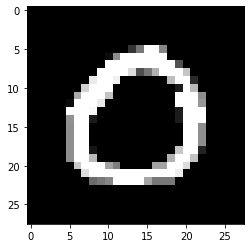

Output:  0

Prediction (Softmax) from the neural network:
 [[1.00000000e+00 5.24552019e-17 1.11512033e-09 3.28033191e-11
  1.24950297e-19 1.40855350e-12 5.03588013e-12 3.55619700e-12
  1.13982775e-10 1.07405619e-10]]

Hard-maxed form of the prediction:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


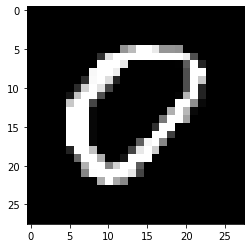

Output:  0

Prediction (Softmax) from the neural network:
 [[9.9996161e-01 2.2074774e-16 4.4409749e-06 4.0655976e-08 1.1061962e-11
  5.5685220e-13 2.6873178e-05 4.6805297e-07 1.1779223e-06 5.3296726e-06]]

Hard-maxed form of the prediction:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


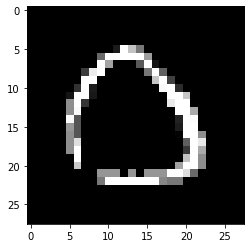

Output:  3

Prediction (Softmax) from the neural network:
 [[2.8070221e-02 5.8157581e-09 1.8281274e-07 9.7190768e-01 1.0376434e-08
  2.0771206e-05 4.1373543e-08 6.9401432e-07 7.4369673e-08 3.6127571e-07]]

Hard-maxed form of the prediction:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


Prediction


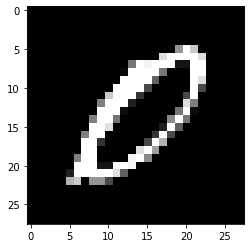

Output:  0

Prediction (Softmax) from the neural network:
 [[9.9998212e-01 1.8795125e-09 1.7744267e-05 1.7733589e-11 1.4771517e-10
  7.7192801e-12 2.2298074e-08 5.1248139e-10 1.4052607e-07 2.0146376e-10]]

Hard-maxed form of the prediction:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


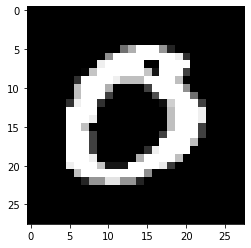

Output:  0

Prediction (Softmax) from the neural network:
 [[1.00000000e+00 8.09765235e-18 5.39473024e-12 1.18664778e-09
  4.81915890e-19 1.13394046e-14 9.06005132e-11 2.95404784e-10
  1.01802031e-16 1.66297953e-09]]

Hard-maxed form of the prediction:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


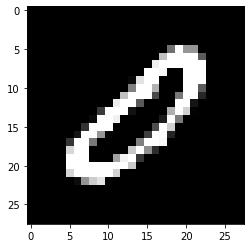

Output:  0

Prediction (Softmax) from the neural network:
 [[9.9796247e-01 7.4104534e-10 2.0369580e-03 4.1056516e-11 1.4356046e-09
  2.3114420e-10 1.5421081e-08 4.1326238e-11 6.3224707e-07 7.2800169e-12]]

Hard-maxed form of the prediction:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


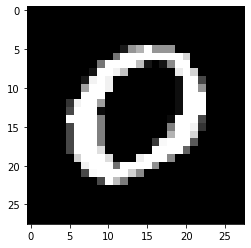

Output:  0

Prediction (Softmax) from the neural network:
 [[9.9999917e-01 1.8539594e-16 8.5549863e-07 8.3063702e-15 9.7383918e-16
  2.9628349e-15 1.2537450e-10 3.6693036e-12 1.7391442e-12 2.0336477e-10]]

Hard-maxed form of the prediction:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


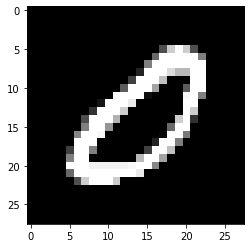

Output:  0

Prediction (Softmax) from the neural network:
 [[1.0000000e+00 1.2332231e-11 2.2305906e-09 4.1574762e-14 4.6470096e-16
  1.7491957e-12 2.8351163e-13 1.6509612e-16 9.7425757e-13 2.5313397e-12]]

Hard-maxed form of the prediction:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


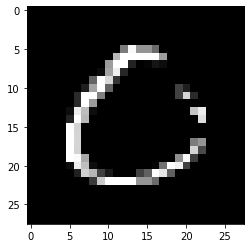

Output:  6

Prediction (Softmax) from the neural network:
 [[1.63868263e-01 3.68520681e-08 3.38654891e-02 2.05925273e-04
  1.56549606e-06 8.78846933e-08 7.97328651e-01 1.16553456e-04
  4.60226700e-04 4.15313151e-03]]

Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


Prediction


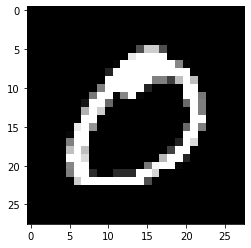

Output:  0

Prediction (Softmax) from the neural network:
 [[9.9999917e-01 7.8788384e-17 8.0336542e-07 2.4867560e-12 4.0867083e-17
  5.5250756e-14 6.3013015e-12 9.8603917e-11 1.4640350e-11 4.3154798e-12]]

Hard-maxed form of the prediction:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


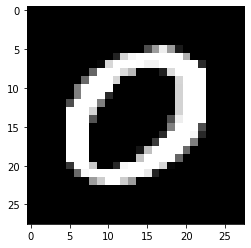

Output:  0

Prediction (Softmax) from the neural network:
 [[1.0000000e+00 3.5446571e-16 2.2524203e-09 1.6047481e-12 1.1393935e-17
  1.7879047e-13 8.7417337e-14 2.2854590e-11 8.6382114e-17 2.4827415e-10]]

Hard-maxed form of the prediction:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Prediction


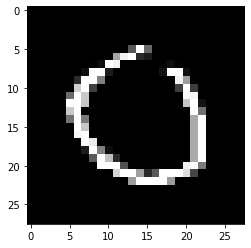

Output:  0

Prediction (Softmax) from the neural network:
 [[9.9872845e-01 1.1658508e-07 5.1415365e-11 2.2814933e-07 4.3821132e-08
  6.6743401e-06 1.1086166e-03 1.2943252e-08 1.9567329e-05 1.3622128e-04]]

Hard-maxed form of the prediction:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]




In [ ]:
for digit in preprocessed_digits:
    prediction = model.predict(digit.reshape(1, 28, 28, 1))   
    print ("Prediction")
    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
    print("Output: ",np.argmax(prediction))
    print ("\nPrediction (Softmax) from the neural network:\n",prediction)
    hard_maxed_prediction = np.zeros(prediction.shape)
    hard_maxed_prediction[0][np.argmax(prediction)] = 1
    print ("\nHard-maxed form of the prediction: ",hard_maxed_prediction)
    print ("\n")